# Imports and Paths

In [87]:
import os

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

import matplotlib.gridspec as gridspec
import datetime as dt
import time

from palettable.cartocolors.qualitative import Prism_8
prism = Prism_8.mpl_colors
import xarray as xr
blue = prism[1]
green = prism[3]
purple = prism[0]
red = prism[7]
orange = prism[6]
yellow = prism[5]
gray = '#303039'

from palettable.cmocean.sequential import Tempo_20
tempo = mcolors.ListedColormap(Tempo_20.mpl_colors)
from palettable.cmocean.diverging import Balance_20
bal = Balance_20.mpl_colormap
from palettable.cmocean.diverging import Curl_20

curltop =  mcolors.ListedColormap(Curl_20.mpl_colors[10:])
curlbot =  mcolors.ListedColormap(Curl_20.mpl_colors[:10])
import sys
from palettable.cmocean.sequential import Deep_20
deep = mcolors.ListedColormap(Deep_20.mpl_colors)

from palettable.cmocean.diverging import Balance_20
bal = Balance_20.mpl_colormap

from palettable.cartocolors.diverging import Geyser_7
curl = Geyser_7.mpl_colormap

bal.set_bad('white')

from shared_functions import get_var
from run_params import *

In [85]:
style = '/home/gleung/scripts/styles/bee-presentationtransparent.mplstyle'
lcol = 'white'
bg = '#303039'

plt.style.use(style)

def add_legend(ax):
    leg = ax.legend()
    for h, text in zip(leg.legendHandles, leg.get_texts()):
        try:
            text.set_color(h.get_facecolor()[0])
        except:
            text.set_color(h.get_color())

        
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
 
# Add every font at the specified location
font_dir = ['/home/gleung/scripts/futura']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams['font.family'] = 'Futura'

In [86]:
dataPath = f"/camp2e/gleung/aerograd"

run = 'grad.10000'
ccn = 'CCCMP'

anaPath = f"/camp2e/gleung/aerograd-analysis/"
figPath = f"/camp2e/gleung/aerograd-figures/presentation/"

if not os.path.isdir(figPath):
    os.mkdir(figPath)

# Circulation

In [4]:
run = 'grad.1000'

h = 12

plot = pd.read_pickle(f"{anaPath}{run}/mean_cross_section-{h}.pkl")
suba = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux-{h}.pkl")
winds = pd.read_pickle(f"{anaPath}{run}/mean_wind-{h}.pkl")


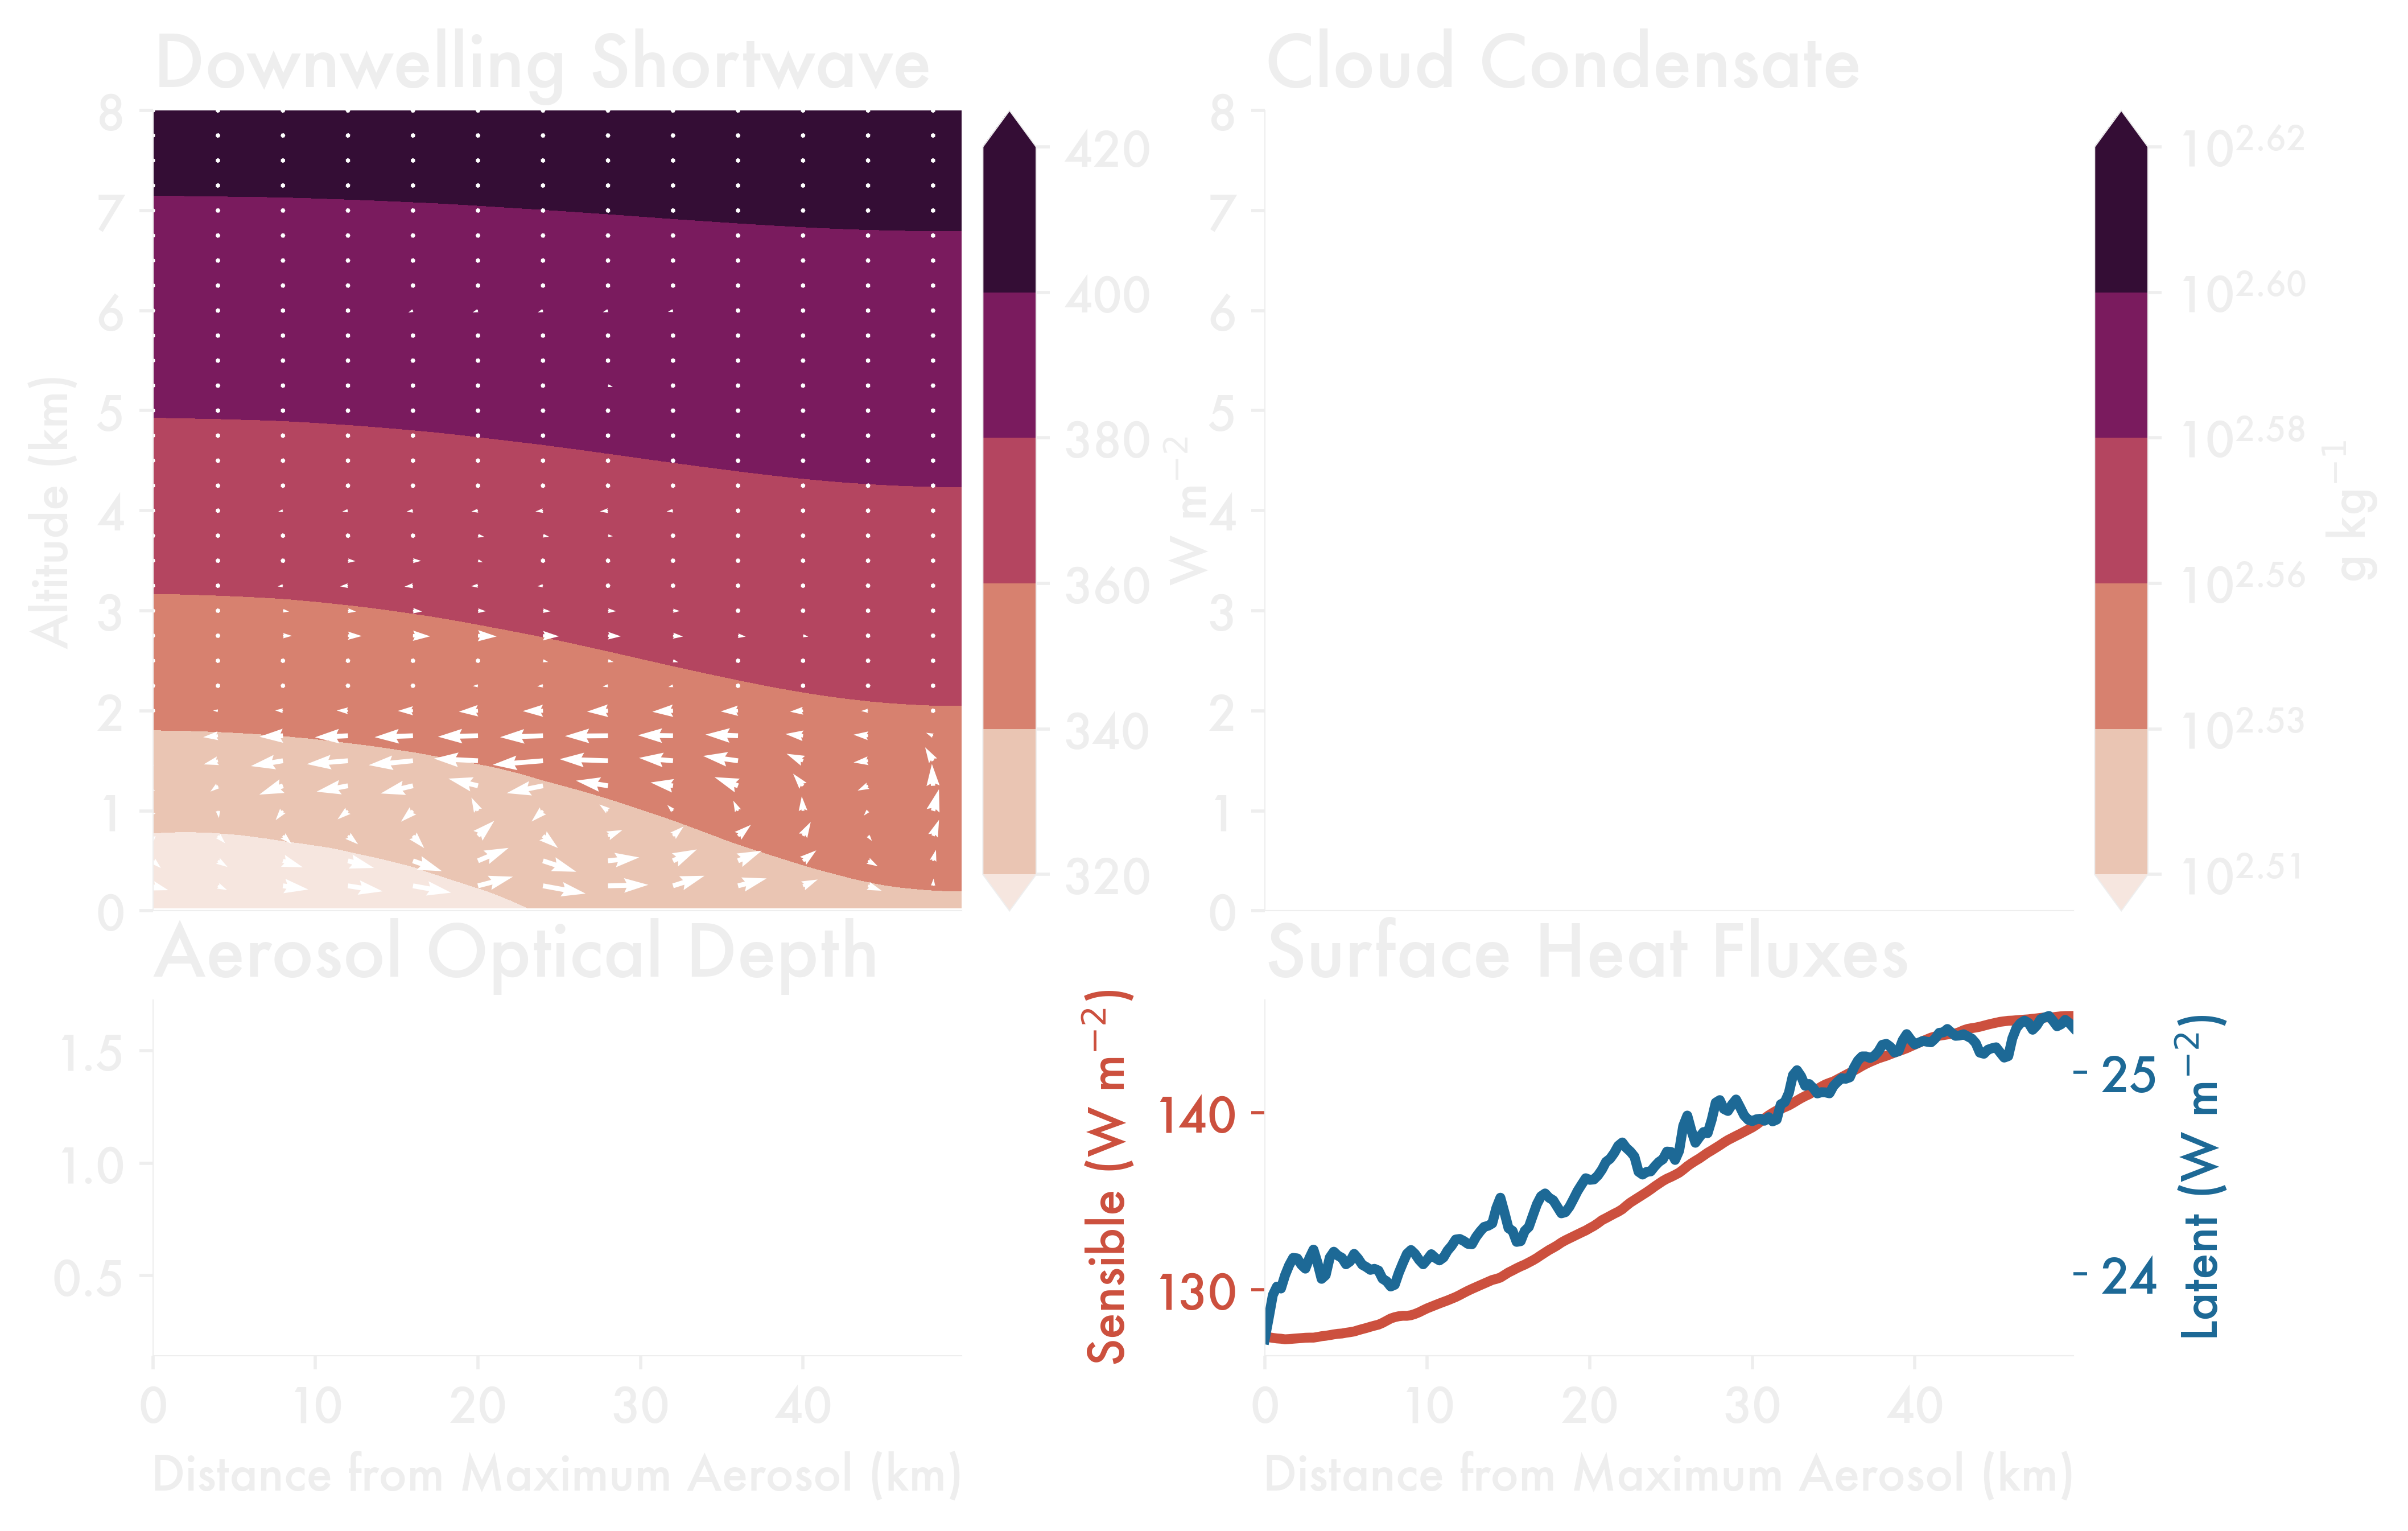

In [176]:
run = 'grad.1000.nomic'

h = 12

plot = pd.read_pickle(f"{anaPath}{run}/mean_cross_section-{h}.pkl")
suba = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux-{h}.pkl")
winds = pd.read_pickle(f"{anaPath}{run}/mean_wind-{h}.pkl")


fig = plt.figure(figsize=(7.5,5), constrained_layout=False, tight_layout=False)

spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
ax2 = fig.add_subplot(spec[0:2, 0])
ax1 = fig.add_subplot(spec[0:2, 1], sharex=ax2, sharey=ax2)
ax3 = fig.add_subplot(spec[2, 0], sharex=ax1)
ax4 = fig.add_subplot(spec[2, 1], sharex=ax1)

fig.subplots_adjust(wspace=0.375,hspace=0.25)

ax = ax1
'''c = ax.contourf(sorted(plot.absx.unique()*2), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='TCON')*1000,
            norm = mcolors.LogNorm(),
            levels = np.logspace(-5,0,6),
            extend='both',
            cmap= deep)'''

ax.xaxis.set_visible(False)
    
cax = fig.add_axes([ax.get_position().x1 + 0.01, 
                       ax.get_position().y0,
                       0.025,
                       ax.get_position().y1 - ax.get_position().y0])
plt.colorbar(c,cax=cax, format=mticker.LogFormatterMathtext(),
            label = 'g kg$^{-1}$')

ax = ax2
c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='SWDN'),
            #levels = np.linspace(300,400,11),
            extend='both',
            cmap=curltop)

ax.xaxis.set_visible(False)
    
cax = fig.add_axes([ax.get_position().x1 + 0.01, 
                       ax.get_position().y0,
                       0.025,
                       ax.get_position().y1 - ax.get_position().y0])
plt.colorbar(c,cax=cax,
            label = 'W m$^{-2}$')

for ax in [ax1,ax2]:
    ax.quiver(winds.absx, winds.alt, 
           winds.VC, winds.WC*5,
         scale = 3, width=6E-3,
             color=lcol)

    ax.set_ylim(0,8)
    
ax2.set_ylabel('Altitude (km)')

ax3.plot(suba.index, suba.AODT.rolling(5).mean(),color=lcol,
        label = 'Gradient')

ax4.plot(suba.index, suba.SHF, color=red)
ax4b = ax4.twinx()
ax4b.plot(suba.index, suba.LHF, color=blue)

ax4.set_ylabel('Sensible (W m$^{{-2}}$)')
ax4b.set_ylabel('Latent (W m$^{{-2}}$)')

ax4.yaxis.label.set_color(red)
ax4.tick_params(axis='y', colors=red)
ax4b.yaxis.label.set_color(blue)
ax4b.tick_params(axis='y', colors=blue)

for ax in [ax3,ax4]:
    ax.set_xlabel('Distance from Maximum Aerosol (km)')

#ax1.set_xlim(0,75)

ax1.set_title("Cloud Condensate")
ax2.set_title("Downwelling Shortwave")
ax3.set_title("Aerosol Optical Depth")
ax4.set_title("Surface Heat Fluxes")

plt.savefig(f"{figPath}/{run}-cross_full_mean.png",
            dpi=300,bbox_inches='tight')

In [177]:
print(figPath)

/camp2e/gleung/aerograd-figures/presentation/


/tmp/ipykernel_13533/467119497.py:22: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000,


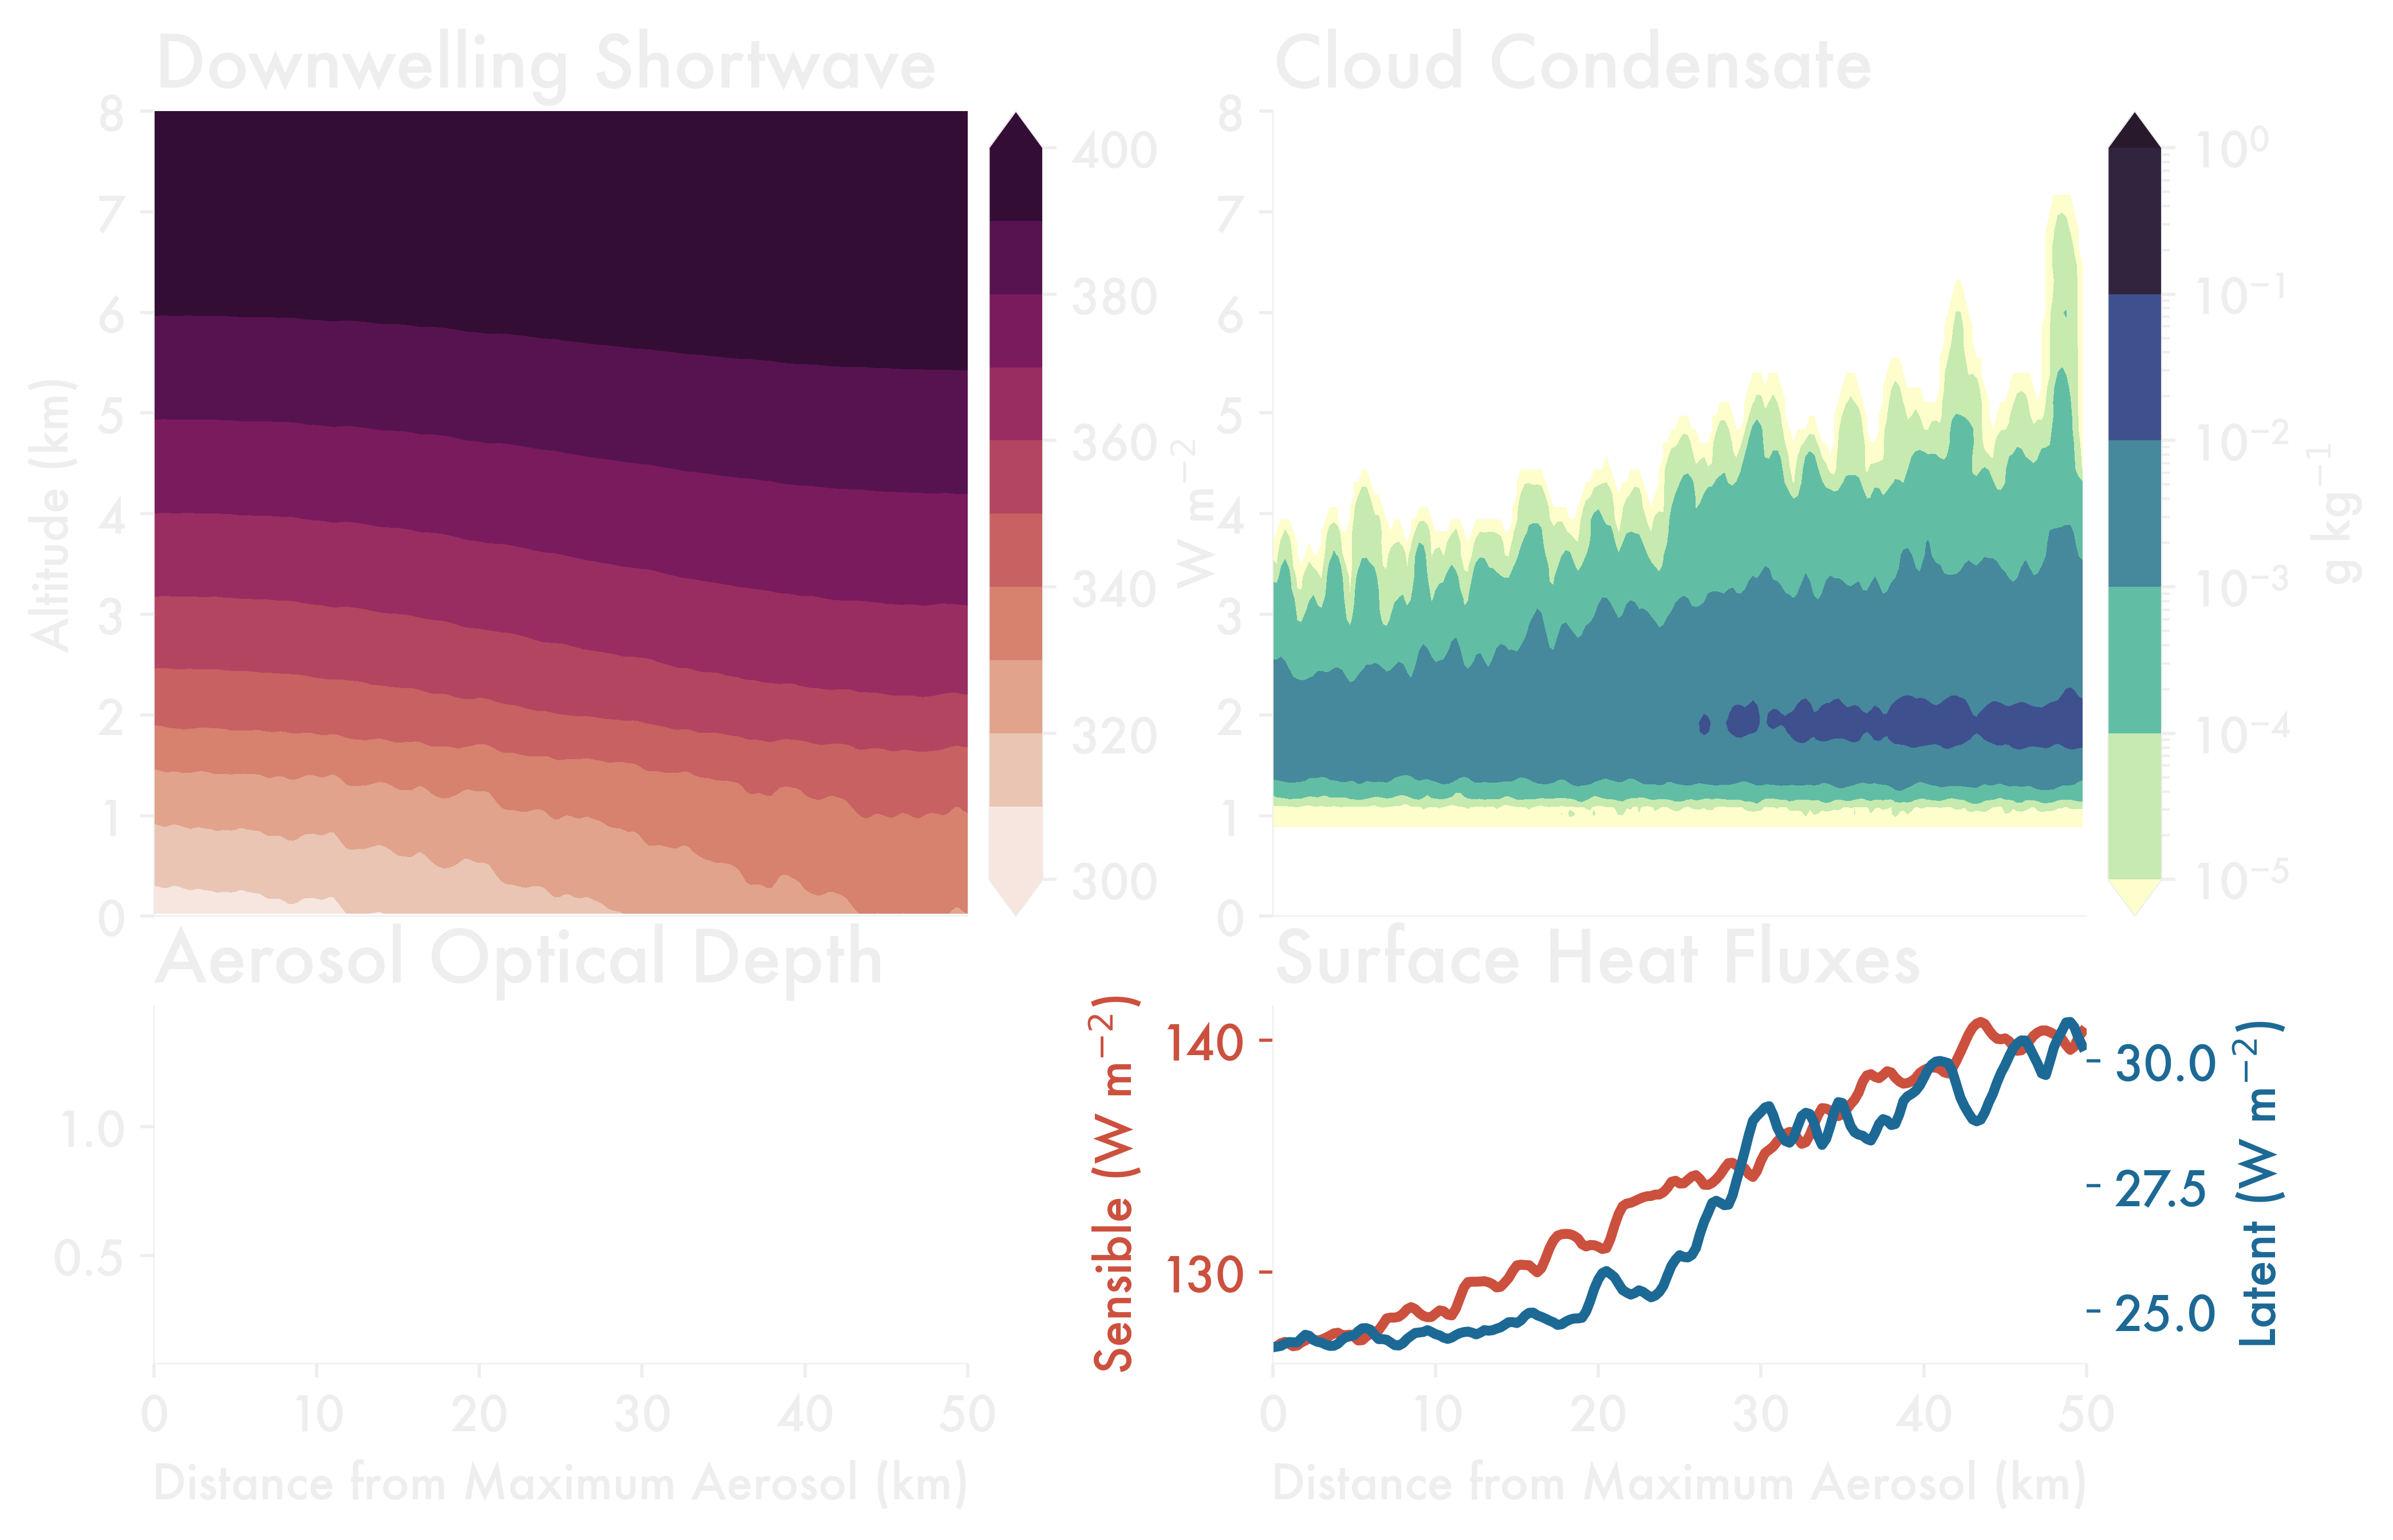

In [39]:
run = 'grad.1000'

h = 12

plot = pd.read_pickle(f"{anaPath}{run}/mean_cross_section-{h}.pkl")
suba = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux-{h}.pkl")
winds = pd.read_pickle(f"{anaPath}{run}/mean_wind-{h}.pkl")

suba_low = pd.read_pickle(f"{anaPath}grad.500/mean_surf_flux-{h}.pkl")

fig = plt.figure(figsize=(7.5,5), constrained_layout=False, tight_layout=False)

spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
ax2 = fig.add_subplot(spec[0:2, 0])
ax1 = fig.add_subplot(spec[0:2, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(spec[2, 0], sharex=ax1)
ax4 = fig.add_subplot(spec[2, 1], sharex=ax1)

fig.subplots_adjust(wspace=0.375,hspace=0.25)

ax = ax1
c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='TCON')*1000,
            norm = mcolors.LogNorm(),
            levels = np.logspace(-5,0,6),
            extend='both',
            cmap= deep)

ax.xaxis.set_visible(False)
    
cax = fig.add_axes([ax.get_position().x1 + 0.01, 
                       ax.get_position().y0,
                       0.025,
                       ax.get_position().y1 - ax.get_position().y0])
plt.colorbar(c,cax=cax, format=mticker.LogFormatterMathtext(),
            label = 'g kg$^{-1}$')

ax = ax2
c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='SWDN'),
            levels = np.linspace(300,400,11),
            extend='both',
            cmap=curltop)

ax.xaxis.set_visible(False)
    
cax = fig.add_axes([ax.get_position().x1 + 0.01, 
                       ax.get_position().y0,
                       0.025,
                       ax.get_position().y1 - ax.get_position().y0])
plt.colorbar(c,cax=cax,
            label = 'W m$^{-2}$')

for ax in [ax1,ax2]:

    ax.set_ylim(0,8)
    
ax2.set_ylabel('Altitude (km)')

ax3.plot(suba.index, suba.AODT.rolling(5).mean(),color=lcol,
        label = 'Gradient')

ax4.plot(suba.index, suba.SHF, color=red)
ax4b = ax4.twinx()
ax4b.plot(suba.index, suba.LHF, color=blue)

ax4.set_ylabel('Sensible (W m$^{{-2}}$)')
ax4b.set_ylabel('Latent (W m$^{{-2}}$)')

ax4.yaxis.label.set_color(red)
ax4.tick_params(axis='y', colors=red)
ax4b.yaxis.label.set_color(blue)
ax4b.tick_params(axis='y', colors=blue)

for ax in [ax3,ax4]:
    ax.set_xlabel('Distance from Maximum Aerosol (km)')

ax1.set_xlim(0,50)

ax1.set_title("Cloud Condensate")
ax2.set_title("Downwelling Shortwave")
ax3.set_title("Aerosol Optical Depth")
ax4.set_title("Surface Heat Fluxes")

plt.savefig(f"{figPath}/{run}-cross_full_mean-nowinds.png",
            dpi=300,bbox_inches='tight')

# Precip Changes

0.12105038428693425
0.2485018527205475


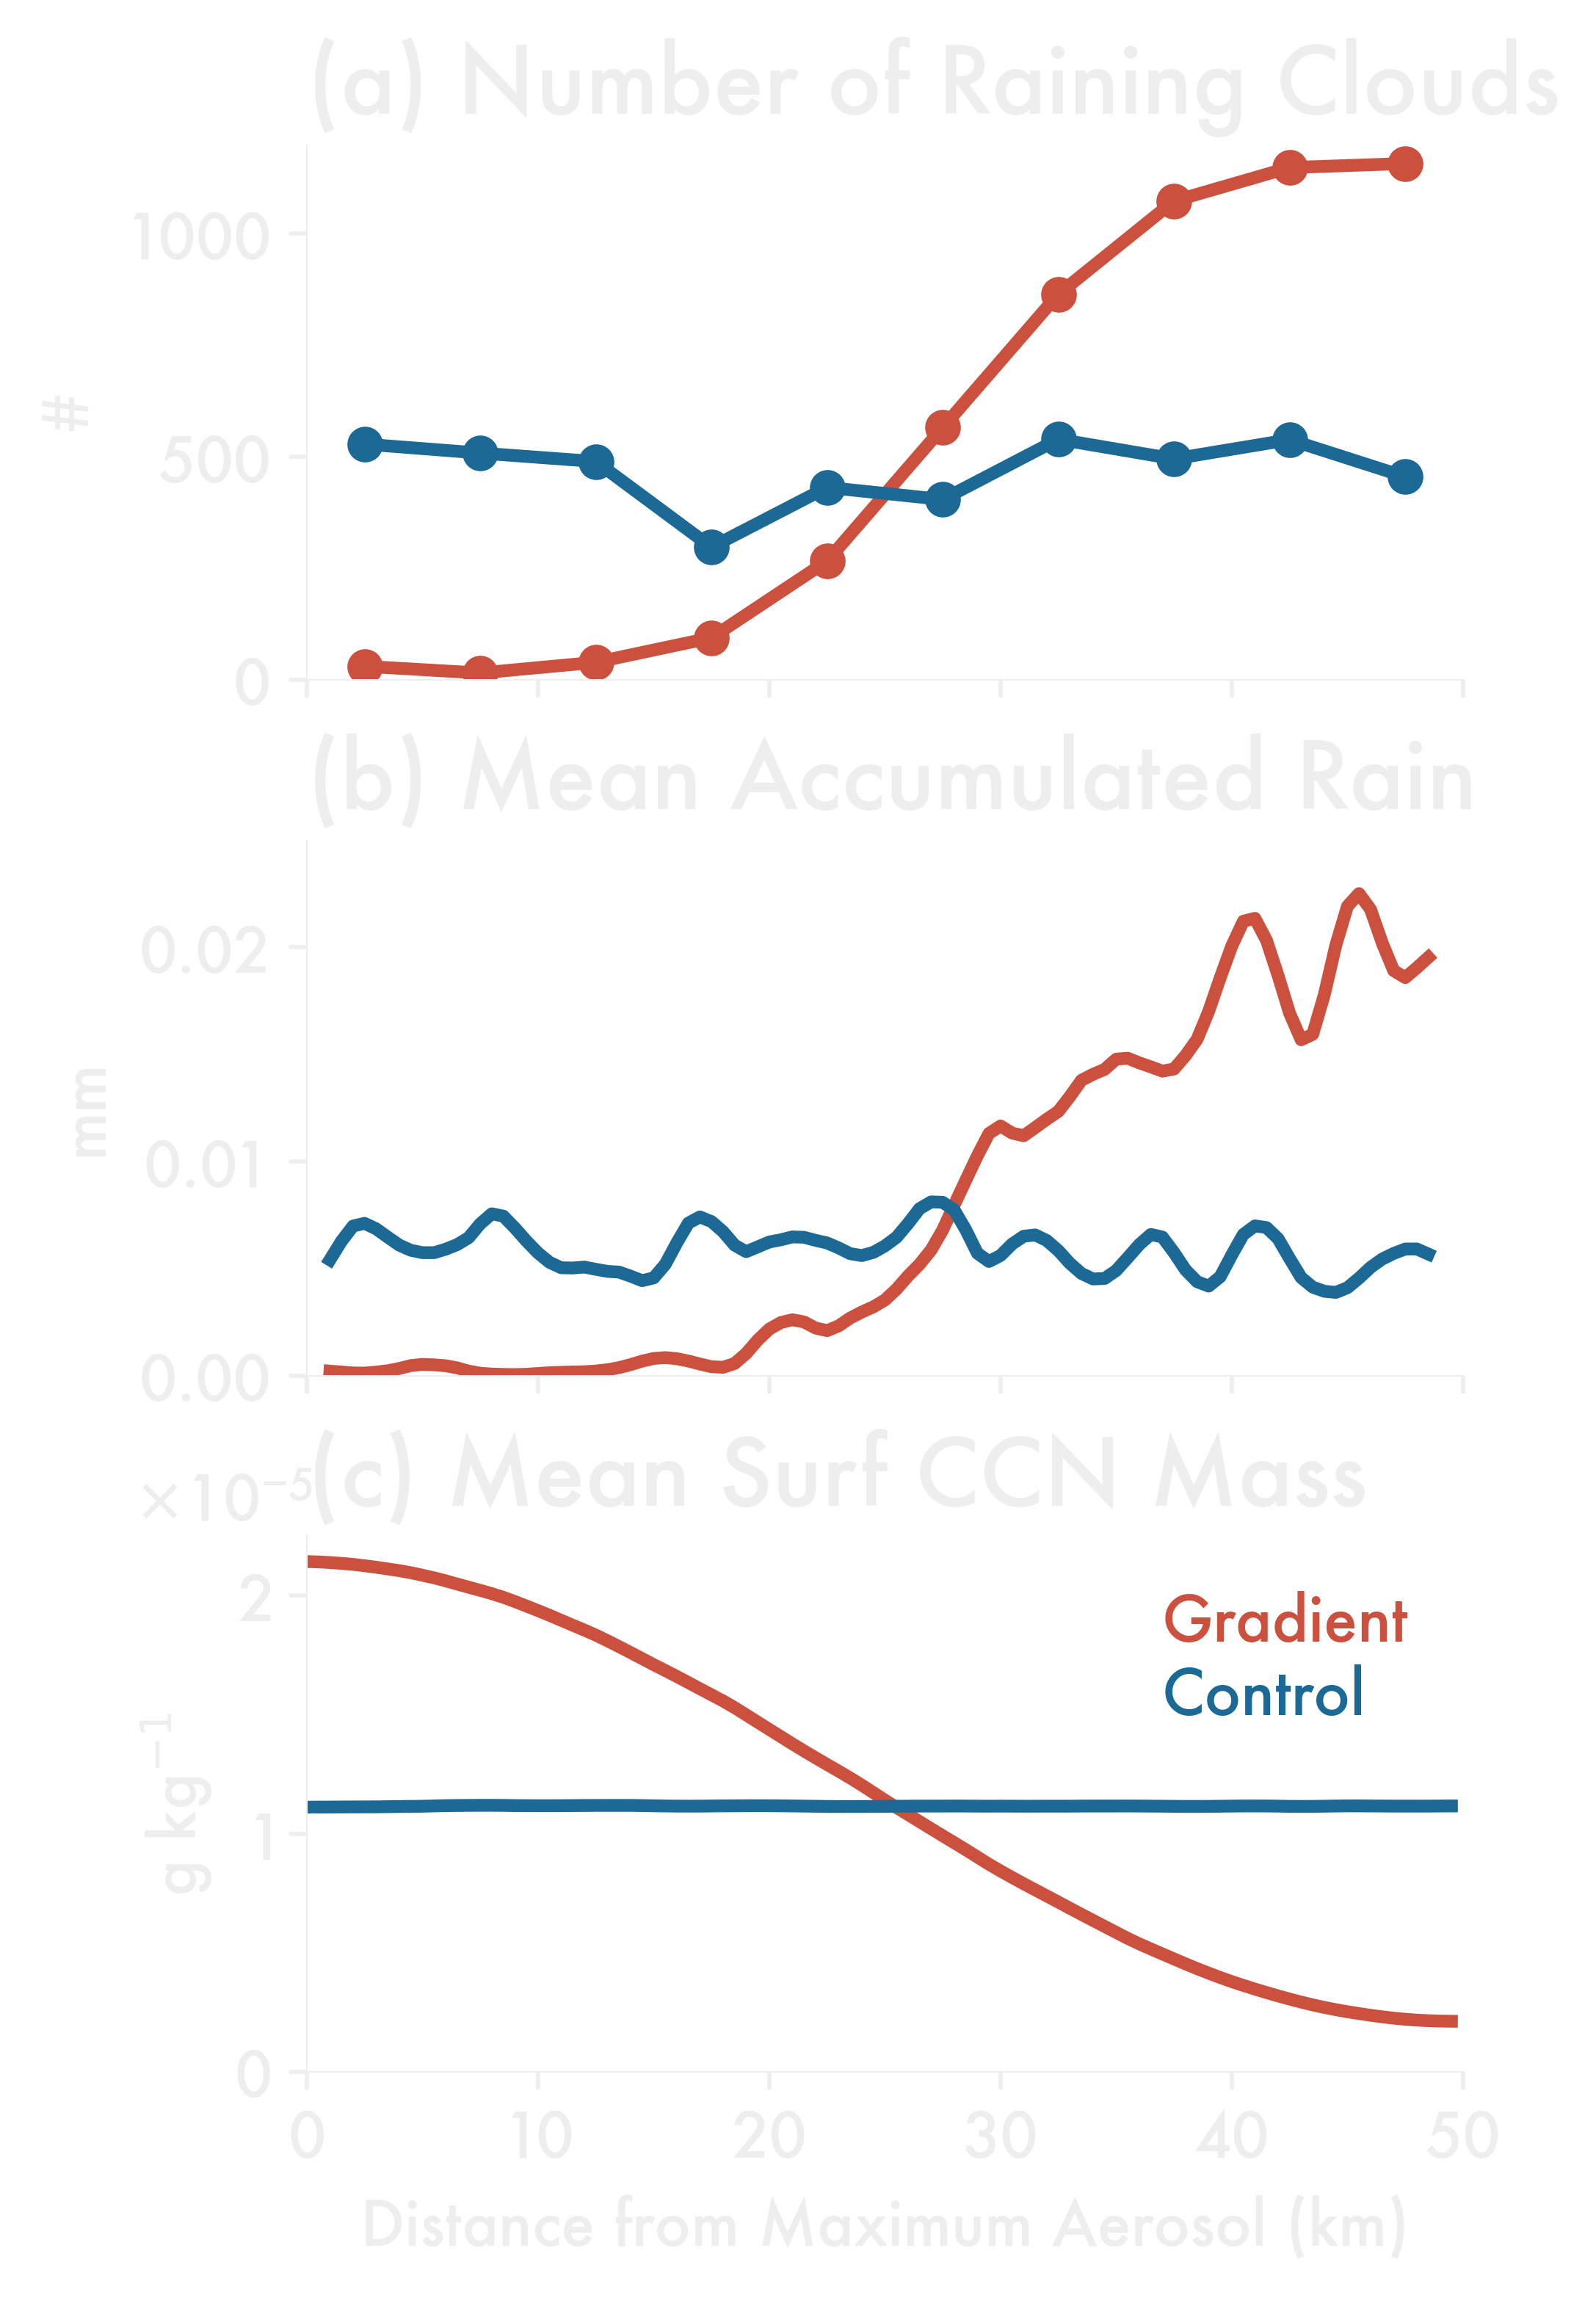

In [7]:
conc = '1000'

resx = 5
h = 12
bins = np.arange(0,50+resx,resx)

g = pd.read_hdf(f"{anaPath}grad.{conc}/tobac-out/w_features_track.h5",'table')
g = g[g.frame<=144]
g['sum_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
g['mean_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
g['maxcell_pcprr'] = g.cell.map(g.groupby('cell').mean_pcprr.mean())
g = g[g.maxcell_pcprr*3600>0.1]
g = g[g.lifetime>dt.timedelta(minutes=5)]
g['absx'] = resx * (abs(((g.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx) 
grad = pd.Series(np.histogram(g.absx, bins = bins)[0]).copy()
grad.index = (bins[1:]+bins[:-1])/2

n = pd.read_hdf(f"{anaPath}nograd.{conc}/tobac-out/w_features_track.h5",'table')
n = n[n.frame<=144]
n['sum_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
n['mean_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
n['maxcell_pcprr'] = n.cell.map(n.groupby('cell').mean_pcprr.mean())
n = n[n.maxcell_pcprr*3600>0.1]
n = n[n.lifetime>dt.timedelta(minutes=5)]
n['absx'] = resx * (abs(((n.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx) 
nograd = pd.Series(np.histogram(n.absx, bins = bins)[0]).copy()
nograd.index = (bins[1:]+bins[:-1])/2

run = f'grad.{conc}'

ccn = pd.read_pickle(f"{anaPath}{run}/CCNsurf-nograd.pkl")
ccng = pd.read_pickle(f"{anaPath}{run}/CCNsurf-grad.pkl")

pcp = pd.read_pickle(f"{anaPath}{run}/PCPsurf-nograd.pkl")
pcpg = pd.read_pickle(f"{anaPath}{run}/PCPsurf-grad.pkl")

fig, axes = plt.subplots(3,1, figsize=(3.5,6), sharex=True)

axes[0].plot(grad,
       marker='o', label='Gradient',
            color=red)

axes[0].plot(nograd,
       marker='o', label='Control',
            color=blue)
      
print((grad.sum()-nograd.sum())/nograd.sum())

axes[1].plot(pcpg.rolling(5, center=True).mean(),color=red)
axes[1].plot(pcp.rolling(5, center=True).mean(),color=blue)
print((pcpg.sum()-pcp.sum())/pcpg.sum())

axes[2].plot(ccng.CCCMP*1000,color=red, label = 'Gradient')
axes[2].plot(ccn.CCCMP*1000,color=blue, label = 'Control')

axes[0].set_ylabel('#')
axes[1].set_ylabel('mm')
axes[2].set_ylabel('g kg$^{-1}$')

axes[0].set_title('(a) Number of Raining Clouds')
axes[1].set_title('(b) Mean Accumulated Rain')
axes[2].set_title('(c) Mean Surf CCN Mass')

axes[2].set_xlabel('Distance from Maximum Aerosol (km)')

axes[2].yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
axes[2].get_yaxis().get_offset_text().set_position((-0.15,0))

axes[0].set_xlim(0,50)

axes[0].set_ylim(0,1200)
axes[1].set_ylim(0,0.025)
axes[2].set_ylim(0,2.25E-5)

add_legend(axes[2])

plt.savefig(f"{figPath}/gradnograd_compare-1.png",dpi=300, bbox_inches='tight')

In [8]:
print(figPath)

/camp2e/gleung/aerograd-figures/presentation/


# Reduced Gradient Circulation

/tmp/ipykernel_13533/2999084186.py:20: UserWarning: Log scale: values of z <= 0 have been masked
  c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000,


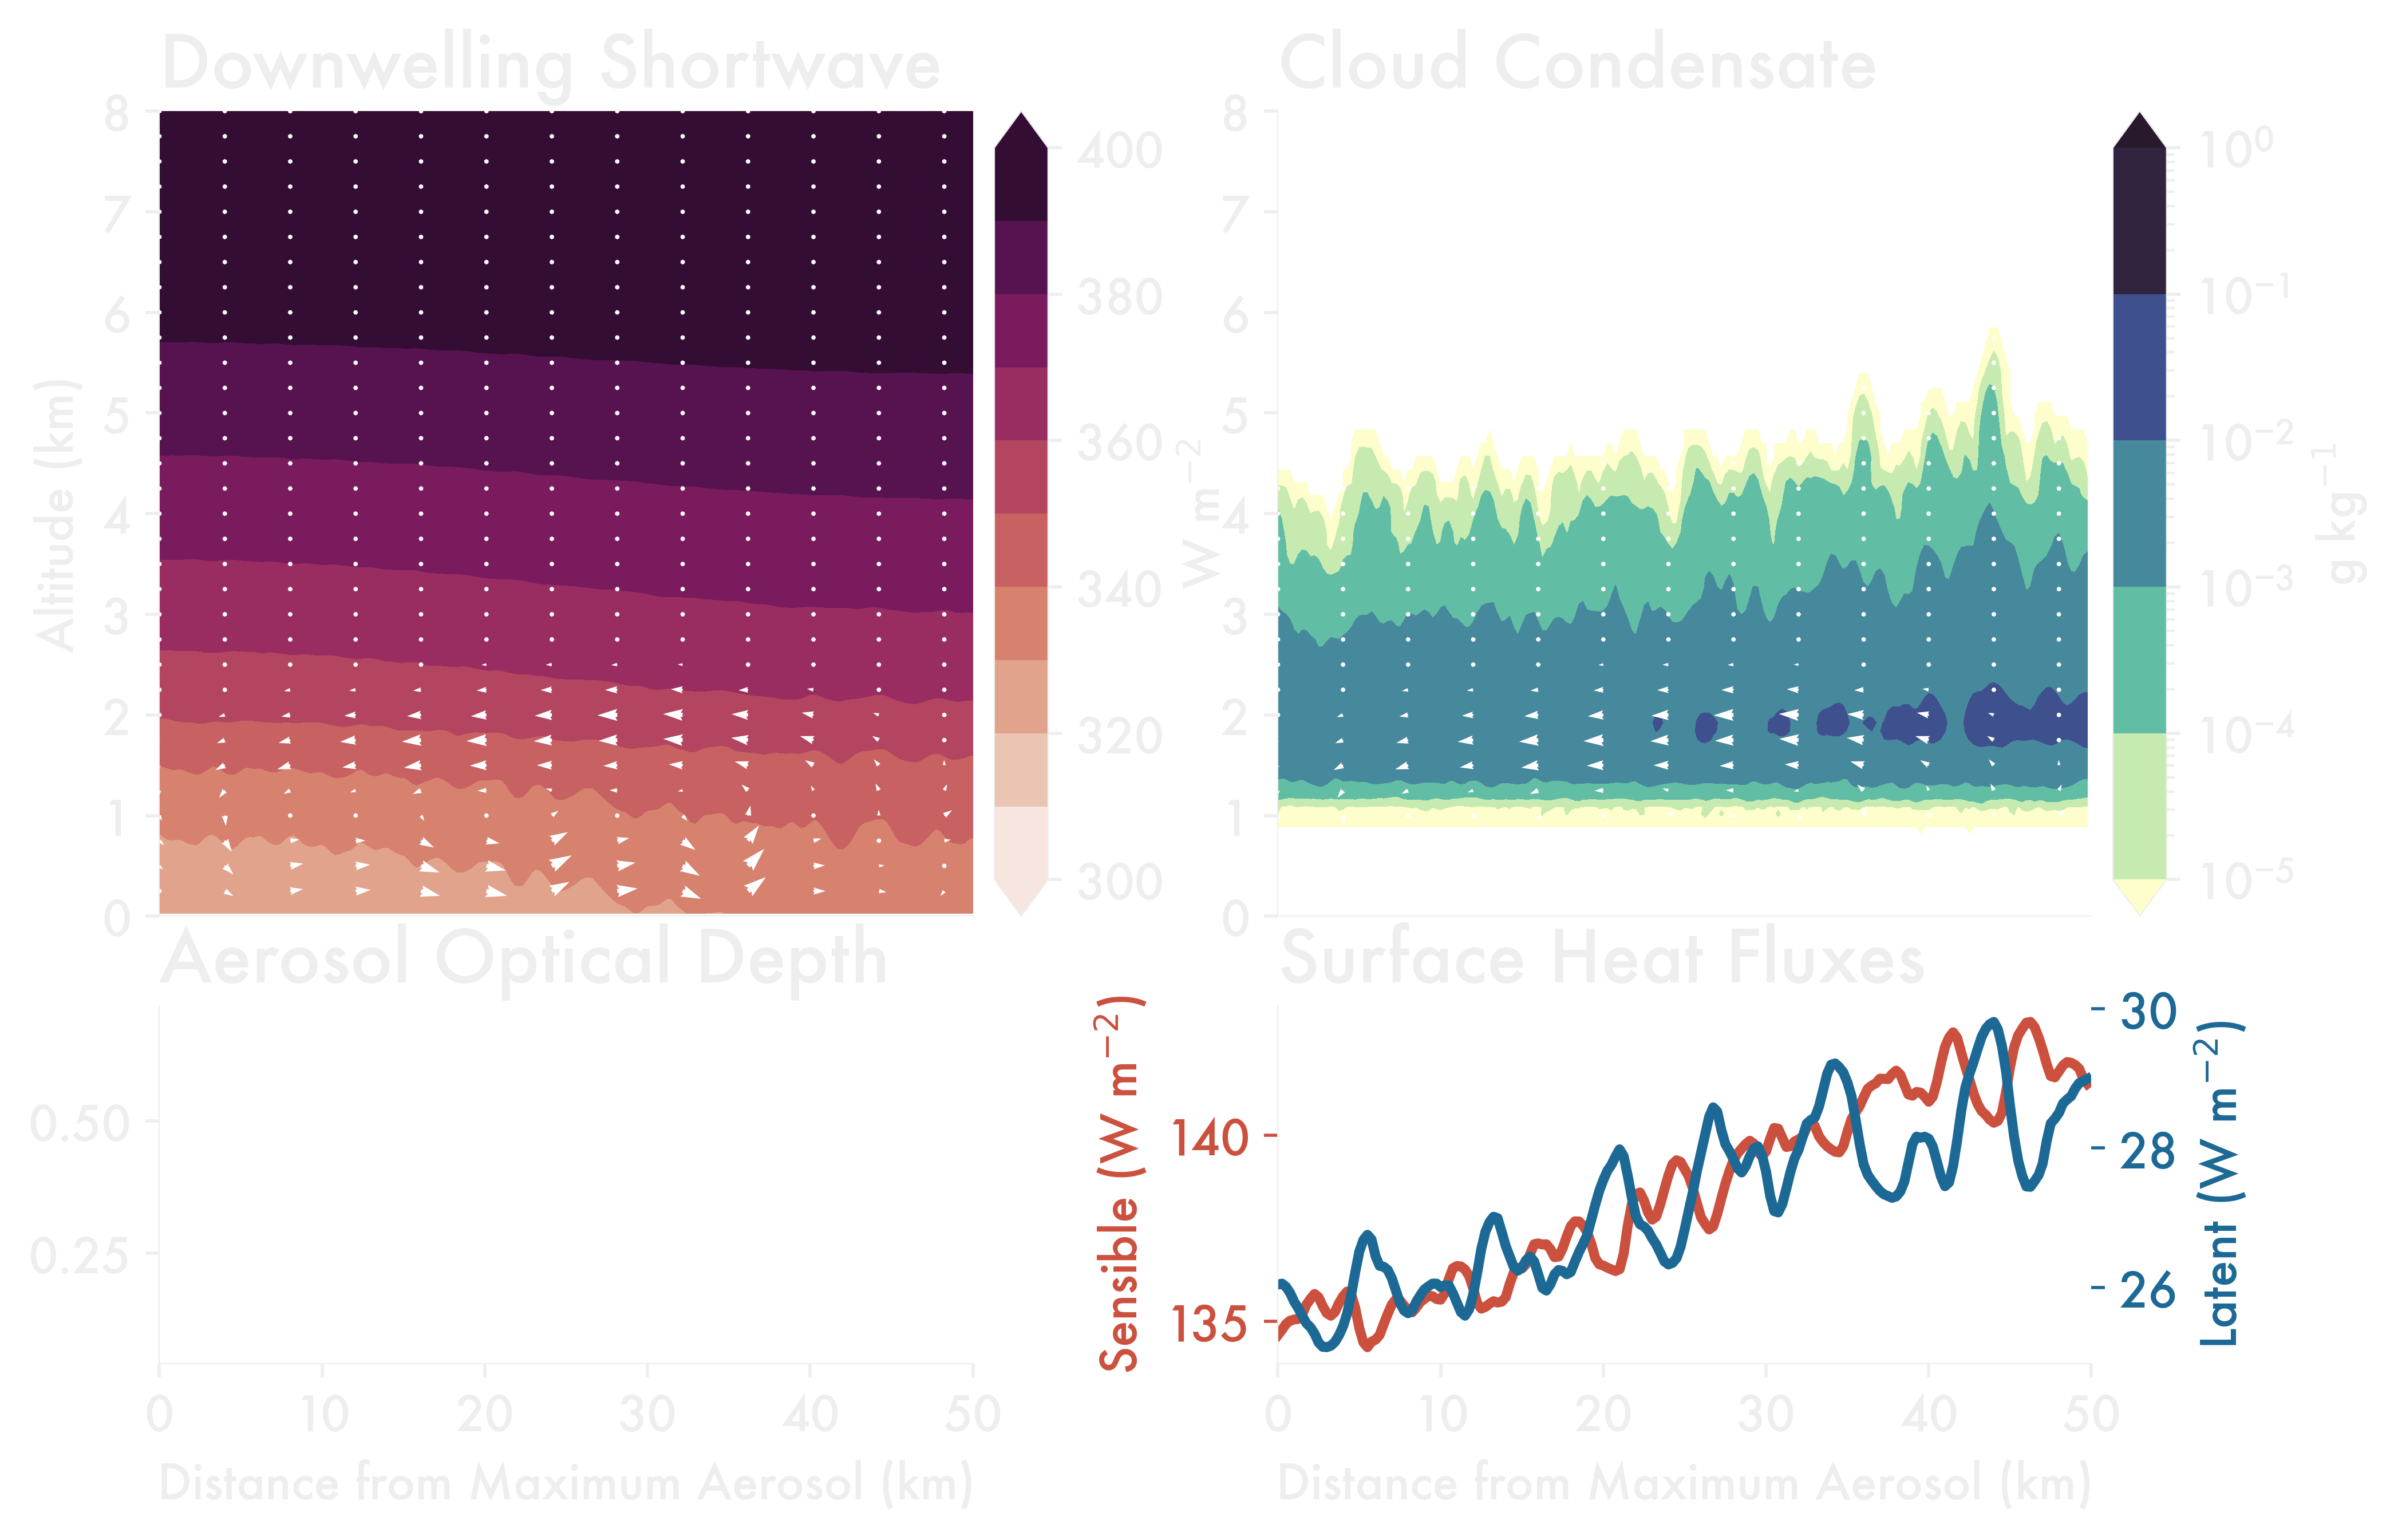

In [41]:
run = 'grad.500'

h = 12

plot = pd.read_pickle(f"{anaPath}{run}/mean_cross_section-{h}.pkl")
suba = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux-{h}.pkl")
winds = pd.read_pickle(f"{anaPath}{run}/mean_wind-{h}.pkl")

fig = plt.figure(figsize=(7.5,5), constrained_layout=False, tight_layout=False)

spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
ax2 = fig.add_subplot(spec[0:2, 0])
ax1 = fig.add_subplot(spec[0:2, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(spec[2, 0], sharex=ax1)
ax4 = fig.add_subplot(spec[2, 1], sharex=ax1)

fig.subplots_adjust(wspace=0.375,hspace=0.25)

ax = ax1
c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='TCON')*1000,
            norm = mcolors.LogNorm(),
            levels = np.logspace(-5,0,6),
            extend='both',
            cmap= deep)

ax.xaxis.set_visible(False)
    
cax = fig.add_axes([ax.get_position().x1 + 0.01, 
                       ax.get_position().y0,
                       0.025,
                       ax.get_position().y1 - ax.get_position().y0])
plt.colorbar(c,cax=cax, format=mticker.LogFormatterMathtext(),
            label = 'g kg$^{-1}$')

ax = ax2
c = ax.contourf(sorted(plot.absx.unique()), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values='SWDN'),
            levels = np.linspace(300,400,11),
            extend='both',
            cmap=curltop)

ax.xaxis.set_visible(False)
    
cax = fig.add_axes([ax.get_position().x1 + 0.01, 
                       ax.get_position().y0,
                       0.025,
                       ax.get_position().y1 - ax.get_position().y0])
plt.colorbar(c,cax=cax,
            label = 'W m$^{-2}$')

for ax in [ax1,ax2]:
    ax.quiver(winds.absx, winds.alt, 
           winds.VC, winds.WC*5,
         scale = 3, width=6E-3,
             color=lcol)

    ax.set_ylim(0,8)
    
ax2.set_ylabel('Altitude (km)')

ax3.plot(suba.index, suba.AODT.rolling(5).mean(),color=lcol)

ax4.plot(suba.index, suba.SHF, color=red)
ax4b = ax4.twinx()
ax4b.plot(suba.index, suba.LHF, color=blue)

ax4.set_ylabel('Sensible (W m$^{{-2}}$)')
ax4b.set_ylabel('Latent (W m$^{{-2}}$)')

ax4.yaxis.label.set_color(red)
ax4.tick_params(axis='y', colors=red)
ax4b.yaxis.label.set_color(blue)
ax4b.tick_params(axis='y', colors=blue)

for ax in [ax3,ax4]:
    ax.set_xlabel('Distance from Maximum Aerosol (km)')

ax1.set_xlim(0,50)

ax1.set_title("Cloud Condensate")
ax2.set_title("Downwelling Shortwave")
ax3.set_title("Aerosol Optical Depth")
ax4.set_title("Surface Heat Fluxes")

plt.savefig(f"{figPath}/cross_full_mean-reducedgradient.png",
            dpi=300,bbox_inches='tight')

In [42]:
conc = '500'

resx = 5
h = 12
bins = np.arange(0,50+resx,resx)

g = pd.read_hdf(f"{anaPath}grad.{conc}/tobac-out/w_features_track.h5",'table')
g = g[g.frame<=144]
g['sum_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
g['mean_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
g['maxcell_pcprr'] = g.cell.map(g.groupby('cell').mean_pcprr.mean())
g = g[g.maxcell_pcprr*3600>0.1]
g = g[g.lifetime>dt.timedelta(minutes=5)]
g['absx'] = resx * (abs(((g.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx) 
grad = pd.Series(np.histogram(g.absx, bins = bins)[0]).copy()
grad.index = (bins[1:]+bins[:-1])/2

n = pd.read_hdf(f"{anaPath}nograd.{conc}/tobac-out/w_features_track.h5",'table')
n = n[n.frame<=144]
n['sum_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
n['mean_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
n['maxcell_pcprr'] = n.cell.map(n.groupby('cell').mean_pcprr.mean())
n = n[n.maxcell_pcprr*3600>0.1]
n = n[n.lifetime>dt.timedelta(minutes=5)]
n['absx'] = resx * (abs(((n.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx) 
nograd = pd.Series(np.histogram(n.absx, bins = bins)[0]).copy()
nograd.index = (bins[1:]+bins[:-1])/2

-0.08652988403211419
-0.1395059042638261


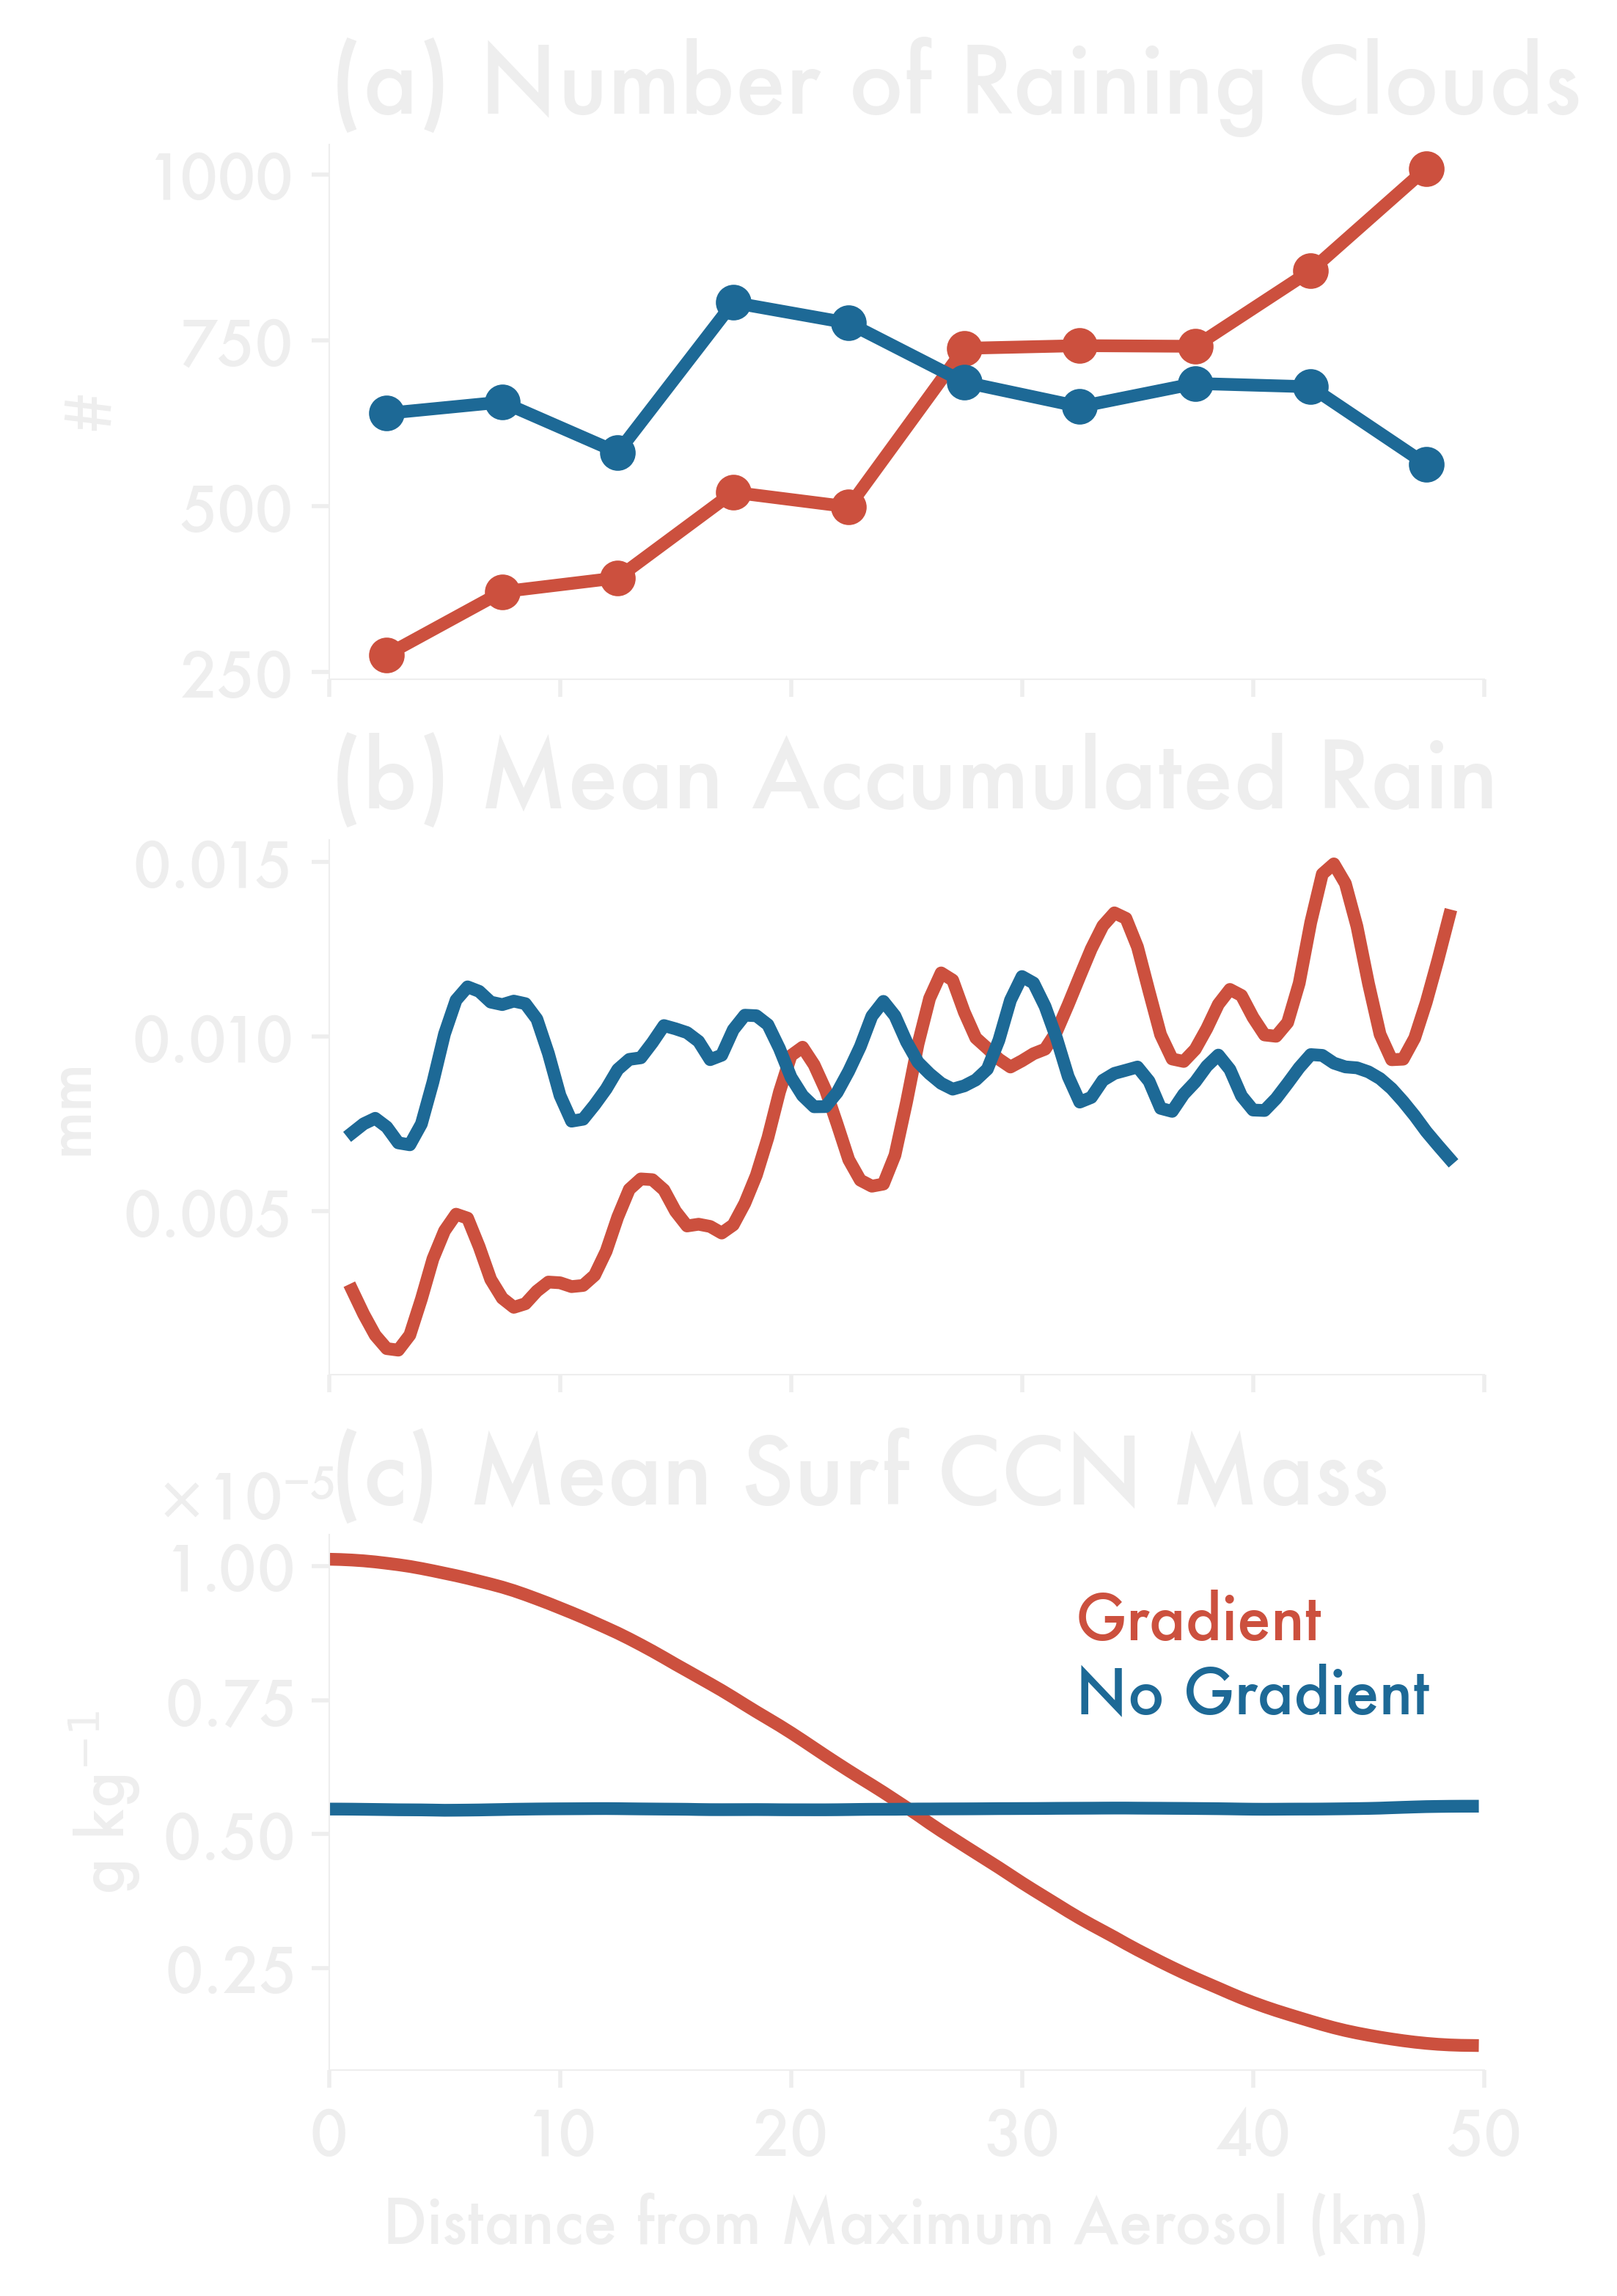

In [43]:
run = 'grad.500'

ccn = pd.read_pickle(f"{anaPath}{run}/CCNsurf-nograd.pkl")
ccng = pd.read_pickle(f"{anaPath}{run}/CCNsurf-grad.pkl")

pcp = pd.read_pickle(f"{anaPath}{run}/PCPsurf-nograd.pkl")
pcpg = pd.read_pickle(f"{anaPath}{run}/PCPsurf-grad.pkl")

fig, axes = plt.subplots(3,1, figsize=(3.5,6), sharex=True)

axes[0].plot(grad,
       marker='o', label='Gradient',
            color=red)

axes[0].plot(nograd,
       marker='o', label='No Gradient',
            color=blue)
      
    
print((grad.sum()-nograd.sum())/nograd.sum())

axes[1].plot(pcpg.rolling(5, center=True).mean(),color=red)
axes[1].plot(pcp.rolling(5, center=True).mean(),color=blue)
print((pcpg.sum()-pcp.sum())/pcpg.sum())

axes[2].plot(ccng.CCCMP*1000,color=red, label = 'Gradient')
axes[2].plot(ccn.CCCMP*1000,color=blue, label = 'No Gradient')

axes[0].set_ylabel('#')
axes[1].set_ylabel('mm')
axes[2].set_ylabel('g kg$^{-1}$')

axes[0].set_title('(a) Number of Raining Clouds')
axes[1].set_title('(b) Mean Accumulated Rain')
axes[2].set_title('(c) Mean Surf CCN Mass')

axes[2].set_xlabel('Distance from Maximum Aerosol (km)')

axes[2].yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
axes[2].get_yaxis().get_offset_text().set_position((-0.15,0))

axes[0].set_xlim(0,50)
#axes[1].set_ylim(0,0.04)

add_legend(axes[2])

plt.savefig(f"{figPath}/gradnograd_compare-reducedgradient.png",dpi=300, bbox_inches='tight')

grad.1000 0.2485018527205475
grad.500 -0.1395059042638261


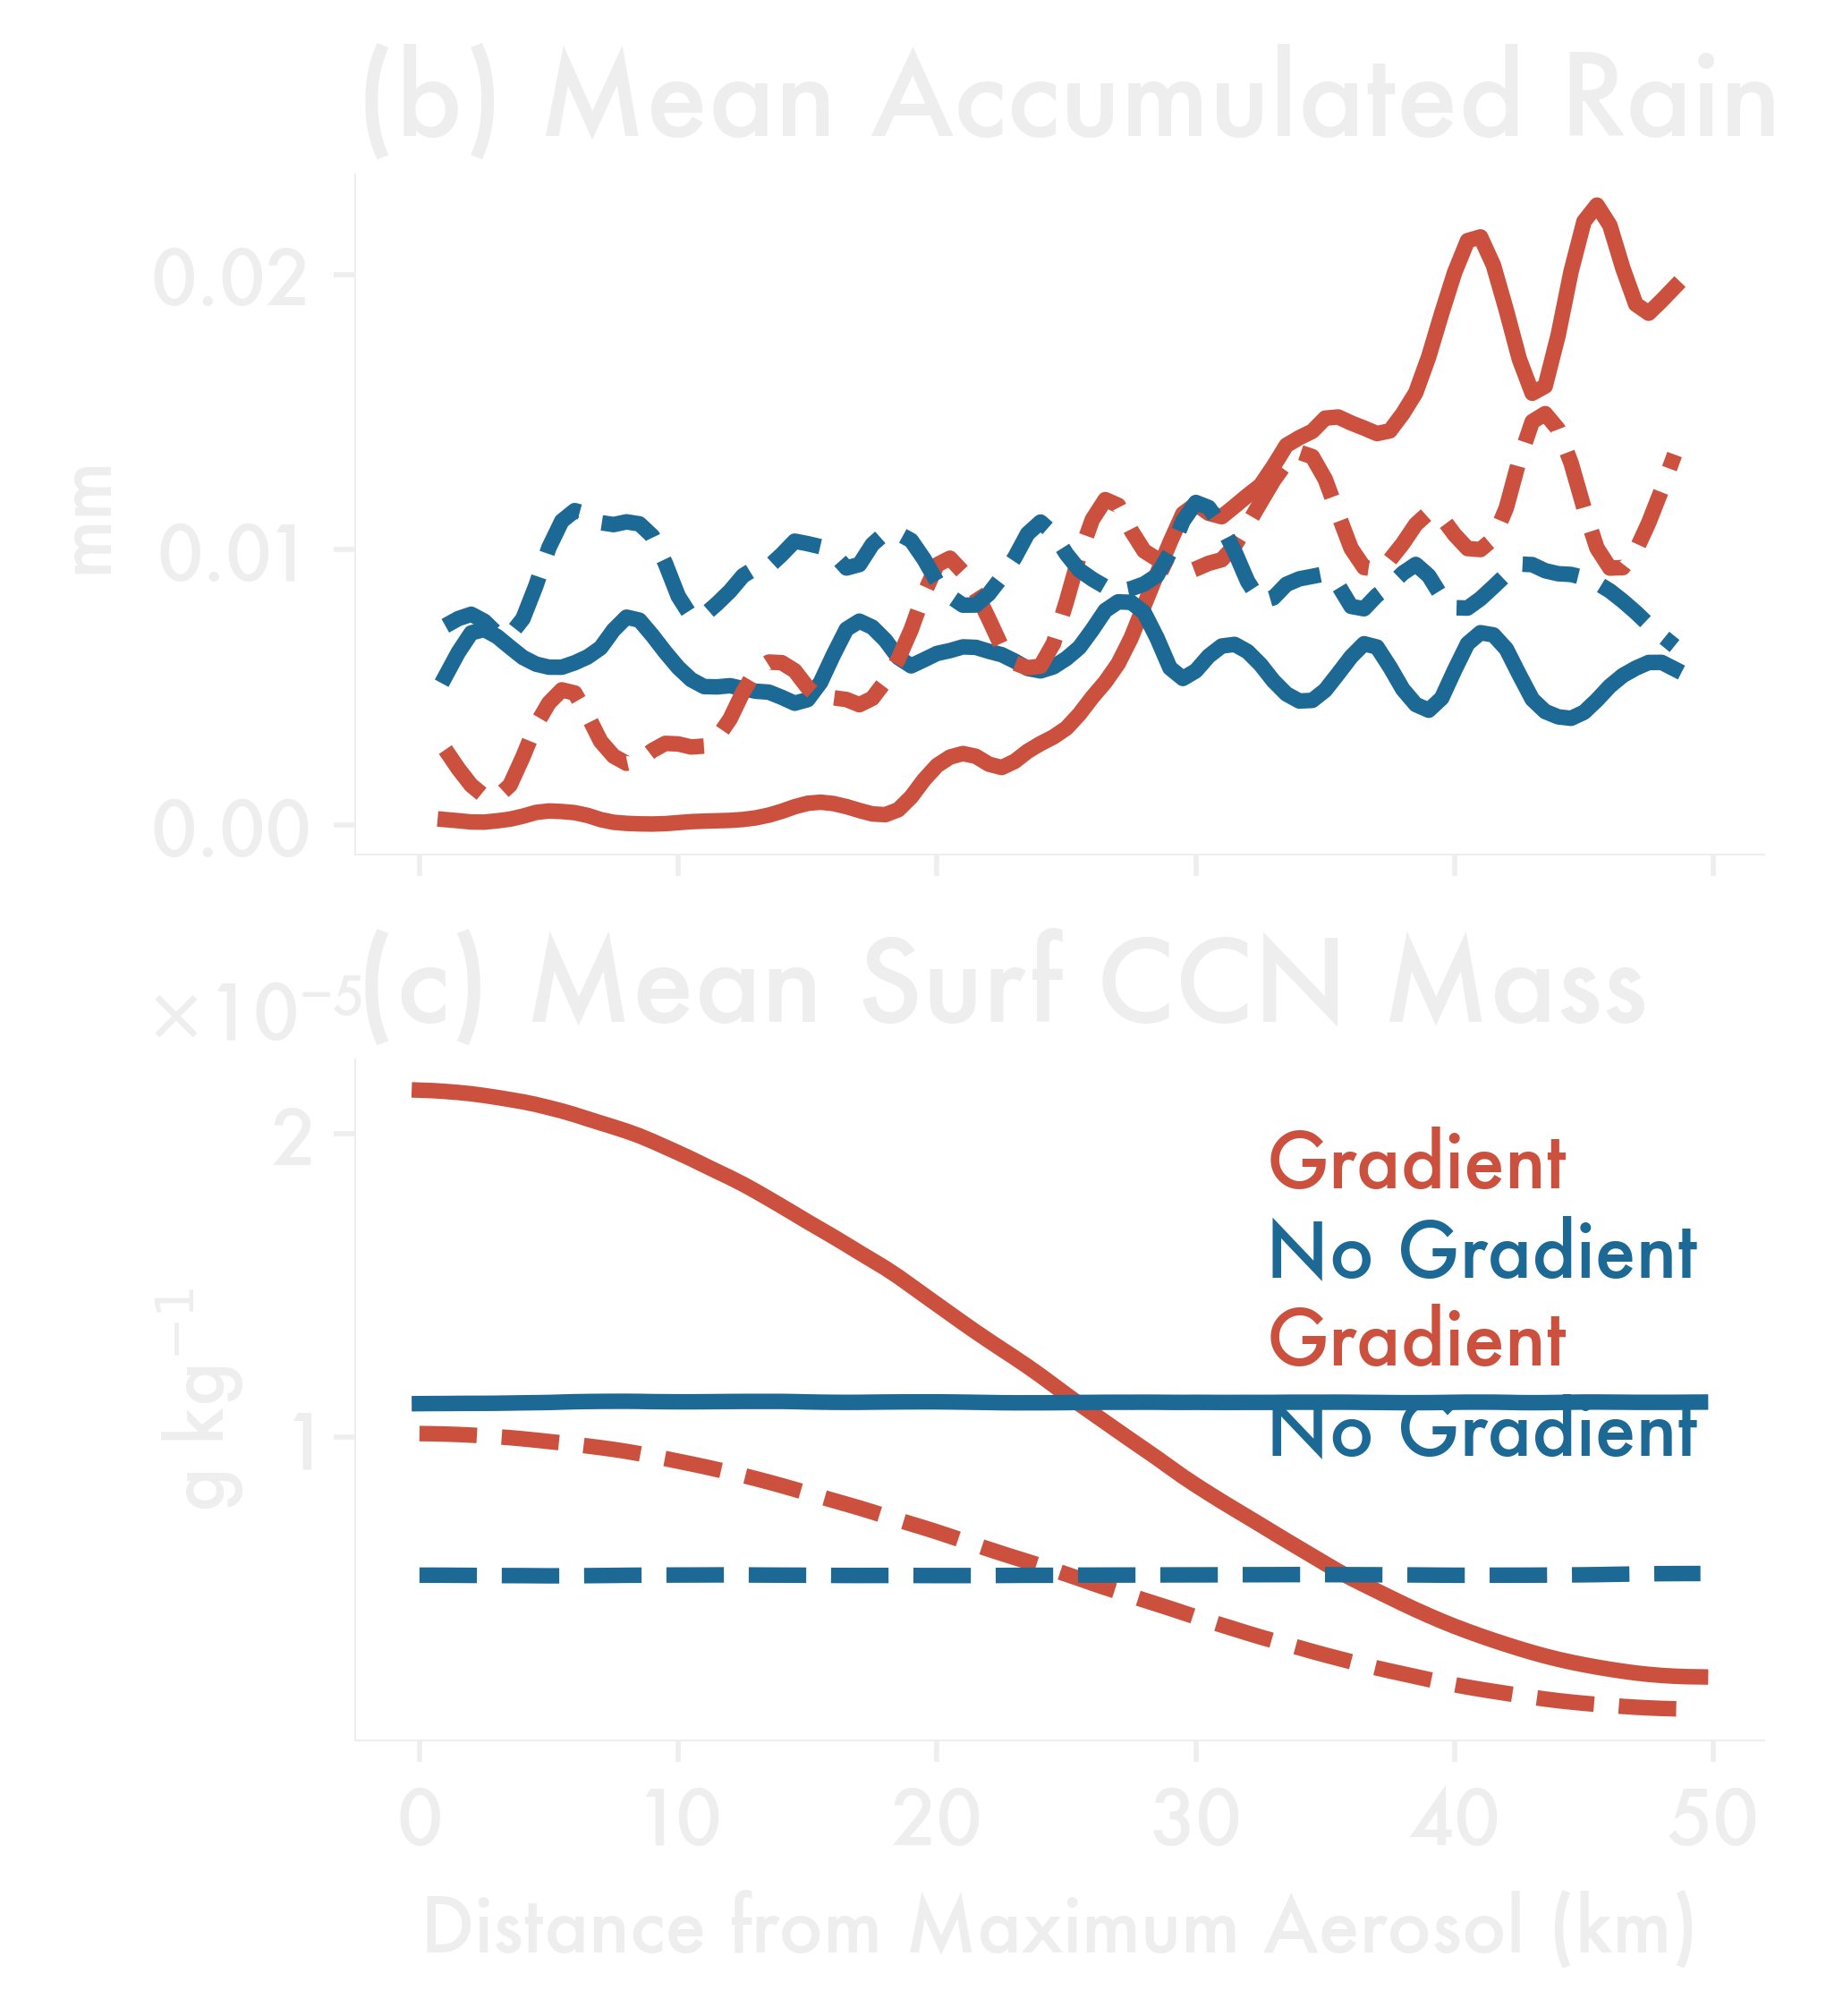

In [23]:
fig, axes = plt.subplots(2,1, figsize=(3.5,4), sharex=True)
    
    
for run, ls in zip(['grad.1000','grad.500'],#,,'grad.1000.norad','grad.500.norad'],
                    ['-','--',':','-.']):

    ccn = pd.read_pickle(f"{anaPath}{run}/CCNsurf-nograd.pkl")
    ccng = pd.read_pickle(f"{anaPath}{run}/CCNsurf-grad.pkl")

    pcp = pd.read_pickle(f"{anaPath}{run}/PCPsurf-nograd.pkl")
    pcpg = pd.read_pickle(f"{anaPath}{run}/PCPsurf-grad.pkl")

    axes[0].plot(pcpg.rolling(5, center=True).mean(),
                 color=red,ls=ls)
    axes[0].plot(pcp.rolling(5, center=True).mean(),
                 color=blue,ls=ls)
    print(run,(pcpg.sum()-pcp.sum())/pcpg.sum())

    axes[1].plot(ccng.CCCMP*1000,
                 color=red, label = 'Gradient', ls=ls)
    axes[1].plot(ccn.CCCMP*1000,
                 color=blue, label = 'No Gradient',ls=ls)

    axes[0].set_ylabel('mm')
    axes[1].set_ylabel('g kg$^{-1}$')

    axes[0].set_title('(b) Mean Accumulated Rain')
    axes[1].set_title('(c) Mean Surf CCN Mass')

    axes[1].set_xlabel('Distance from Maximum Aerosol (km)')

    axes[1].yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
    axes[1].get_yaxis().get_offset_text().set_position((-0.15,0))

add_legend(axes[1])

plt.savefig(f"{figPath}/gradnograd_compare-concs.png",dpi=300, bbox_inches='tight')

# Timeseries

0.2421958168126793
-0.0838500500816549


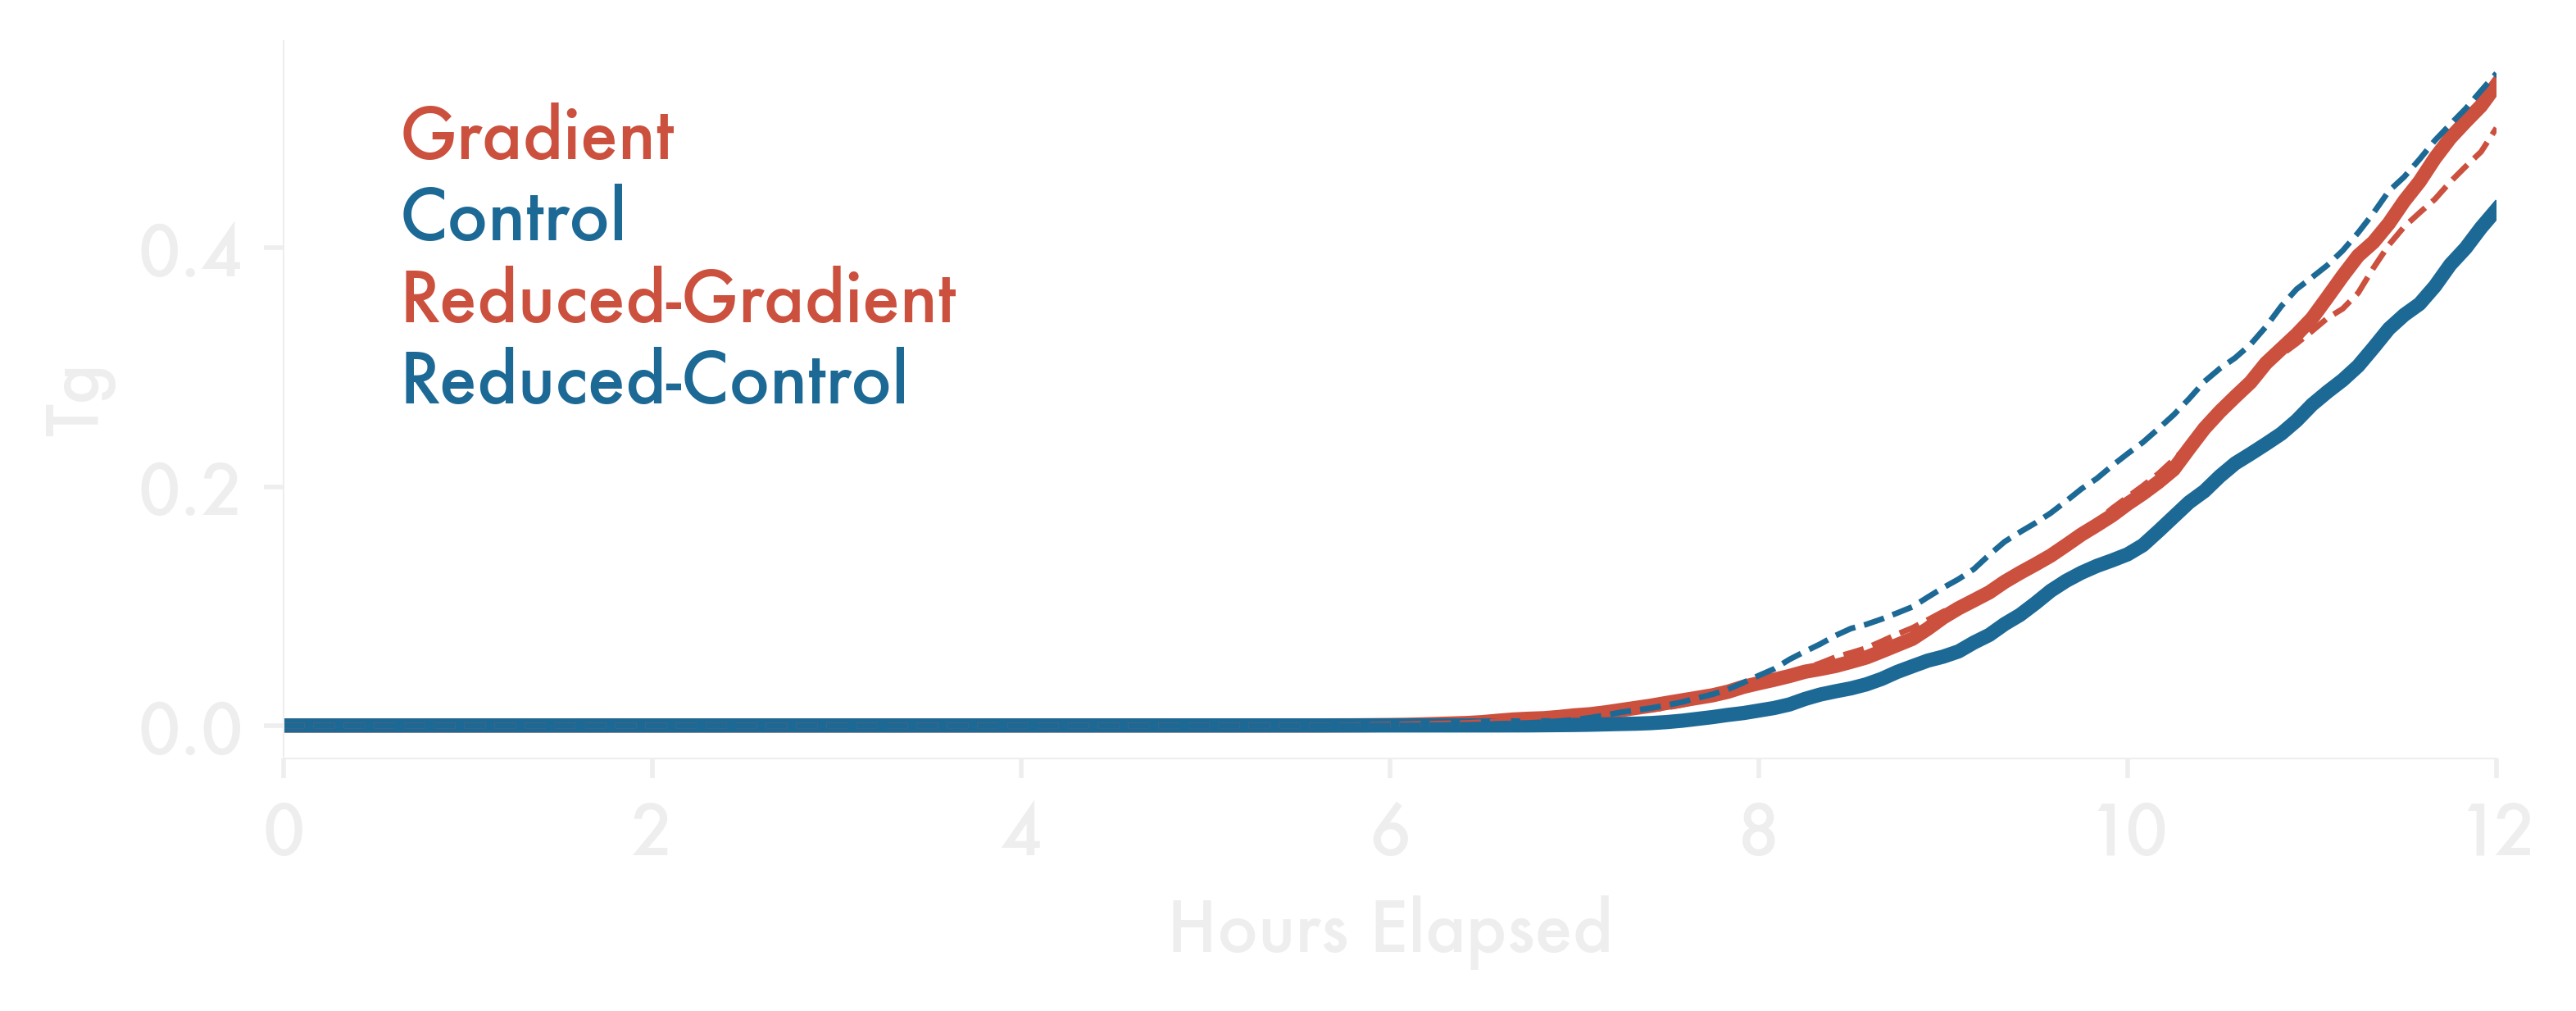

In [95]:
h=12

conc = '1000'

fig, ax = plt.subplots(1,1, figsize=(6,2),sharex=True)

x = (pd.read_pickle(f"{anaPath}grad.{conc}/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()
y = (pd.read_pickle(f"{anaPath}nograd.{conc}/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()

x = x[x.index<12*h +1] * (dx * dy *nx * ny)/1E9
y = y[y.index<12*h +1] * (dx * dy *nx * ny)/1E9

print((x.iloc[-1] - y.iloc[-1])/y.iloc[-1])


ax.plot(x.index/12, x, color=red, label='Gradient')
ax.plot(y.index/12, y, color=blue, label='Control')

x = (pd.read_pickle(f"{anaPath}grad.500/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()
y = (pd.read_pickle(f"{anaPath}nograd.500/mean_surf_flux/ACCPR.pkl").reset_index()).groupby('time').ACCPR.mean()

x = x[x.index<12*h +1] * (dx * dy *nx * ny)/1E9
y = y[y.index<12*h +1] * (dx * dy *nx * ny)/1E9


print((x.iloc[-1] - y.iloc[-1])/y.iloc[-1])

ax.plot(x.index/12, x, color=red, label='Reduced-Gradient',ls = '--', lw=1)
ax.plot(y.index/12, y, color=blue, label='Reduced-Control',ls = '--', lw=1)

ax.set_xlim(0,h)

ax.set_xlabel('Hours Elapsed')

add_legend(ax)

ax.set_ylabel('Tg')

plt.savefig(f"{figPath}/emit_gradnograd_compare_timeseries.png", dpi=300)

# Methods

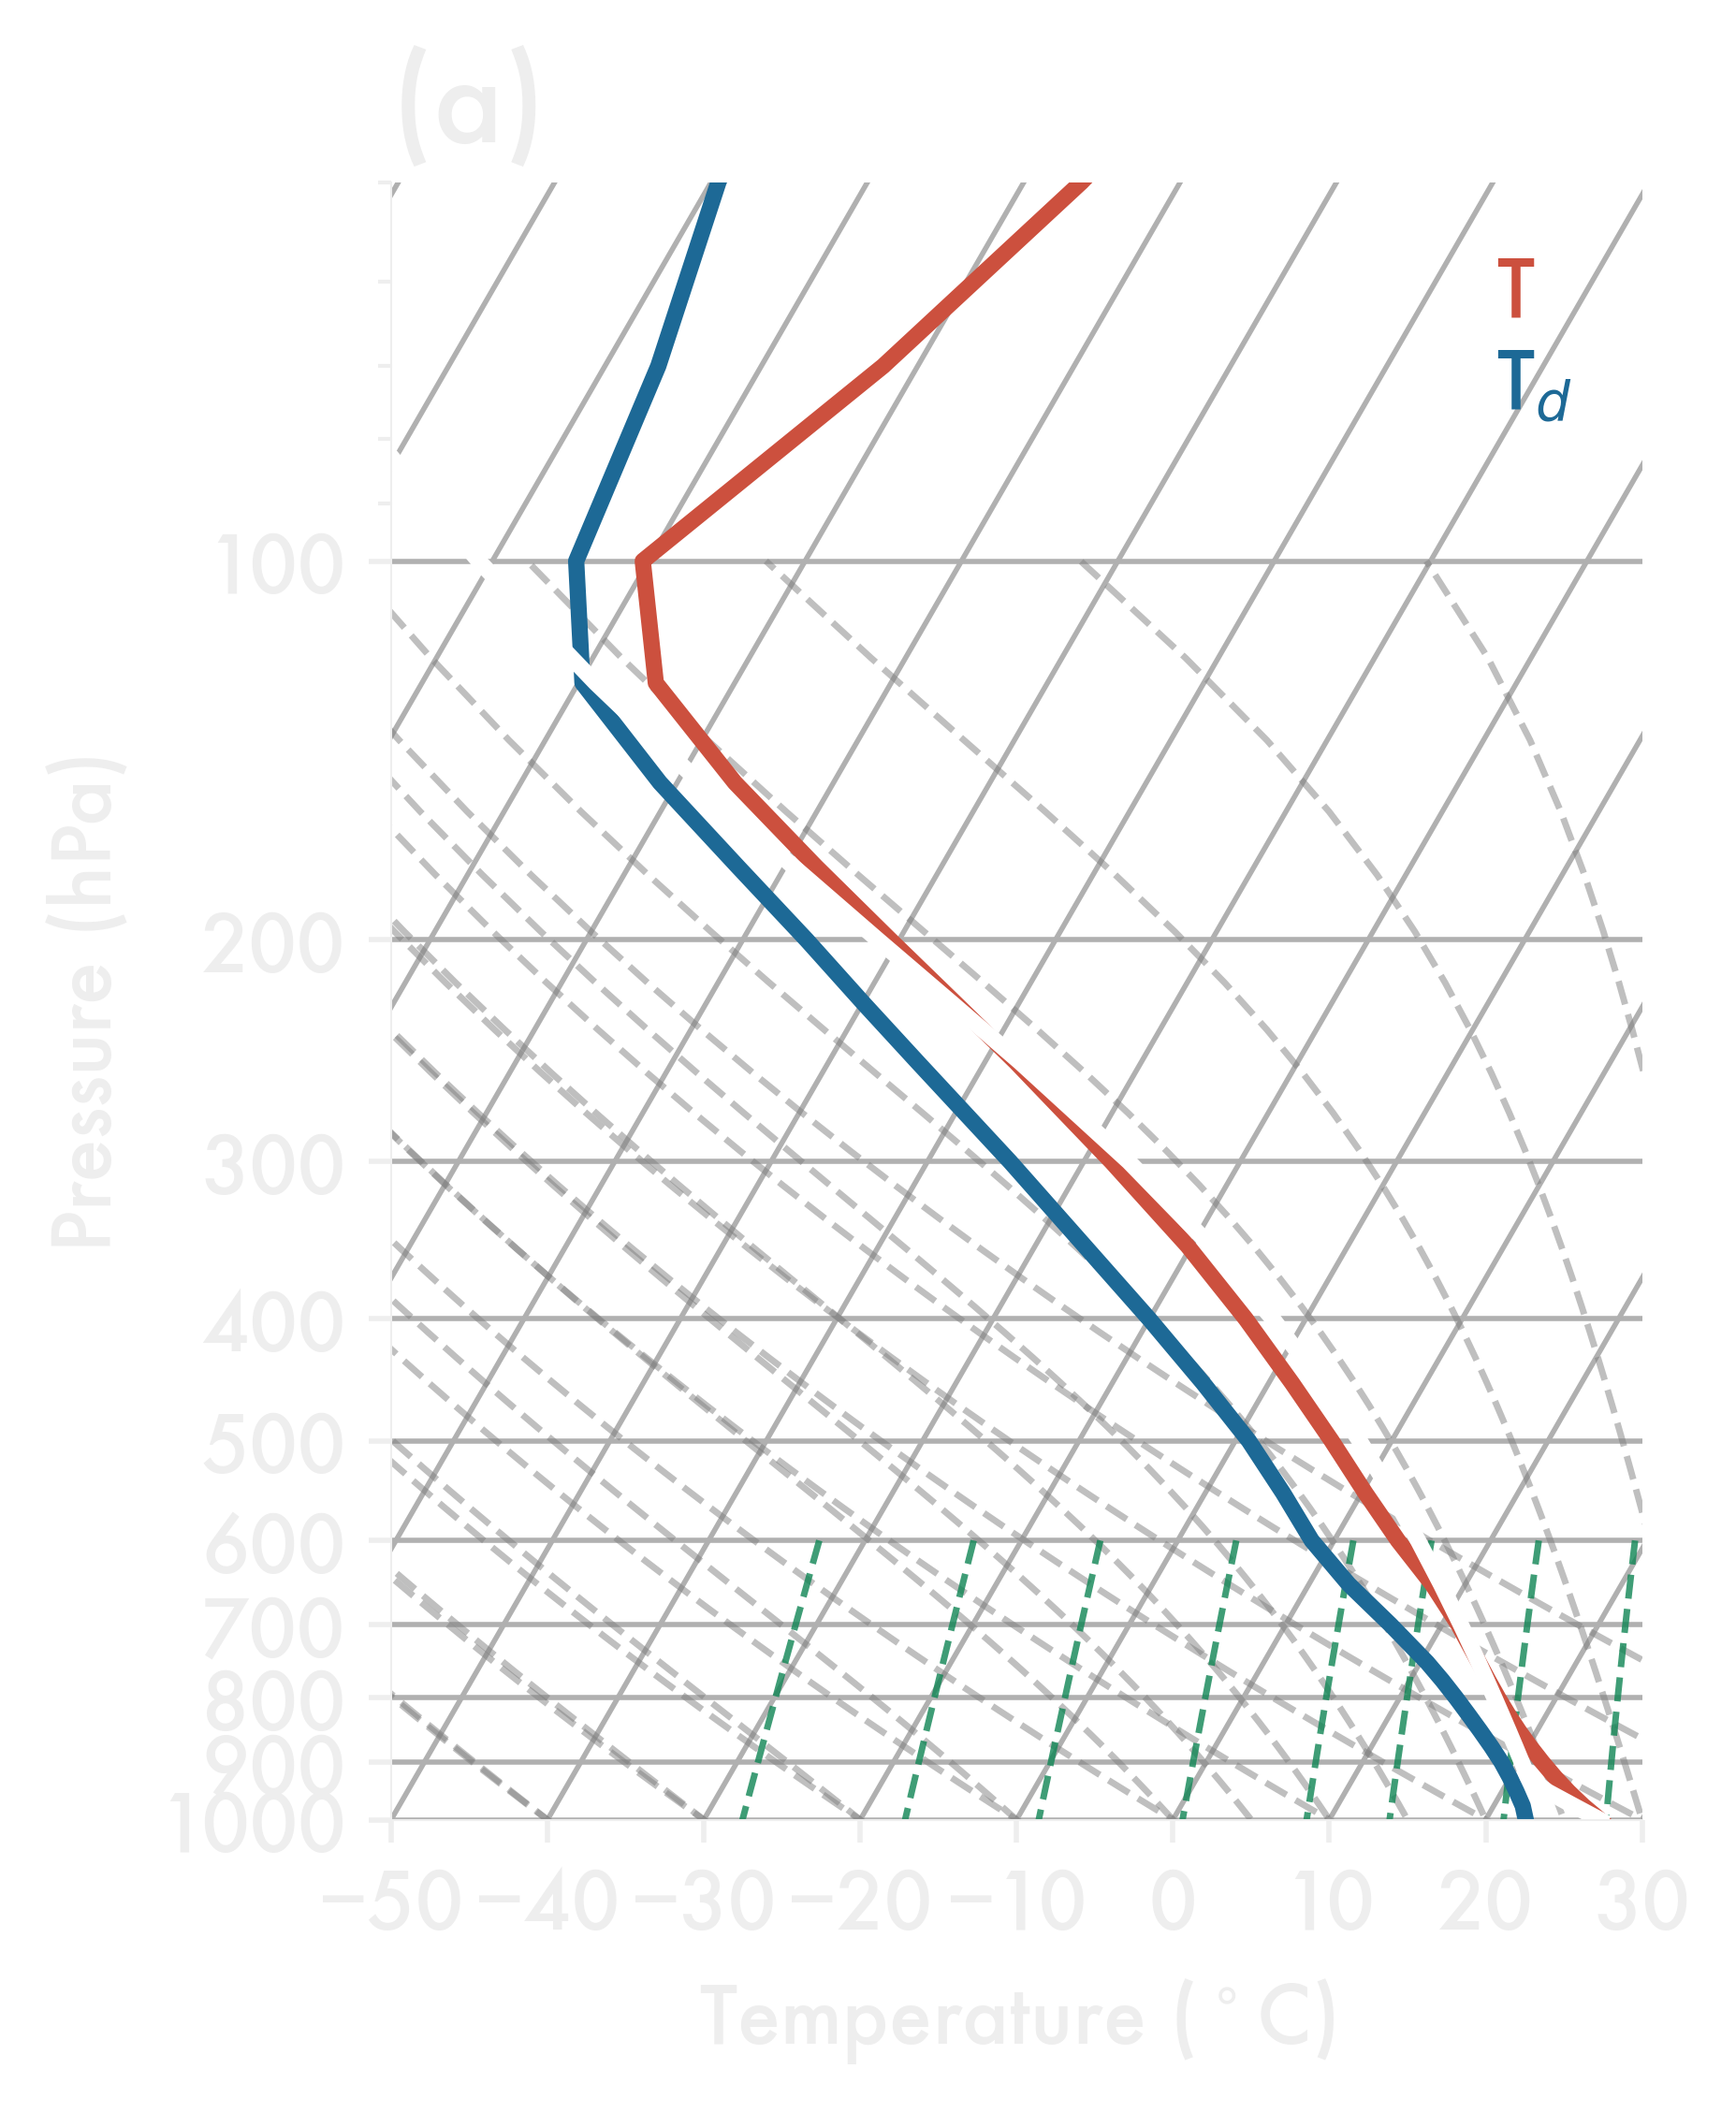

In [104]:
from metpy.plots import SkewT
from metpy.units import units  
import metpy.calc as mcalc
from metpy.plots import SkewT

era = pd.read_pickle("Skewt-land.pkl")

fig = plt.figure(figsize=(3,4))
skew = SkewT(fig, rotation=30)

p = era.index.values * units.hPa
q = era.q.values
T = era.t.values * units.kelvin
Td = mcalc.dewpoint_from_specific_humidity(p,T,q)
skew.ax.set_title('(a)')
skew.plot(p, T,color=red, label = 'T')
skew.plot(p, Td,color=blue, label='T$_d$')

skew.plot_dry_adiabats(colors='gray', lw=1)
skew.plot_moist_adiabats(colors='gray', lw=1)
skew.plot_mixing_lines(colors=green, lw=1)

prof = mpcalc.parcel_profile(p[::-1], T[::-1][0], Td[::-1][0]).to('degC')
skew.plot(p[::-1], prof, lcol)

add_legend(skew.ax)
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_xlabel('Temperature ($^\circ$C)')
skew.ax.set_xlim(-50,30)
skew.ax.set_ylim(1000,50)

plt.savefig(f"{figPath}/skewt.png")

/tmp/ipykernel_13533/1693220795.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.arange(0,100,0.1),
/tmp/ipykernel_13533/1693220795.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax2.pcolormesh(np.arange(0,100,0.1),


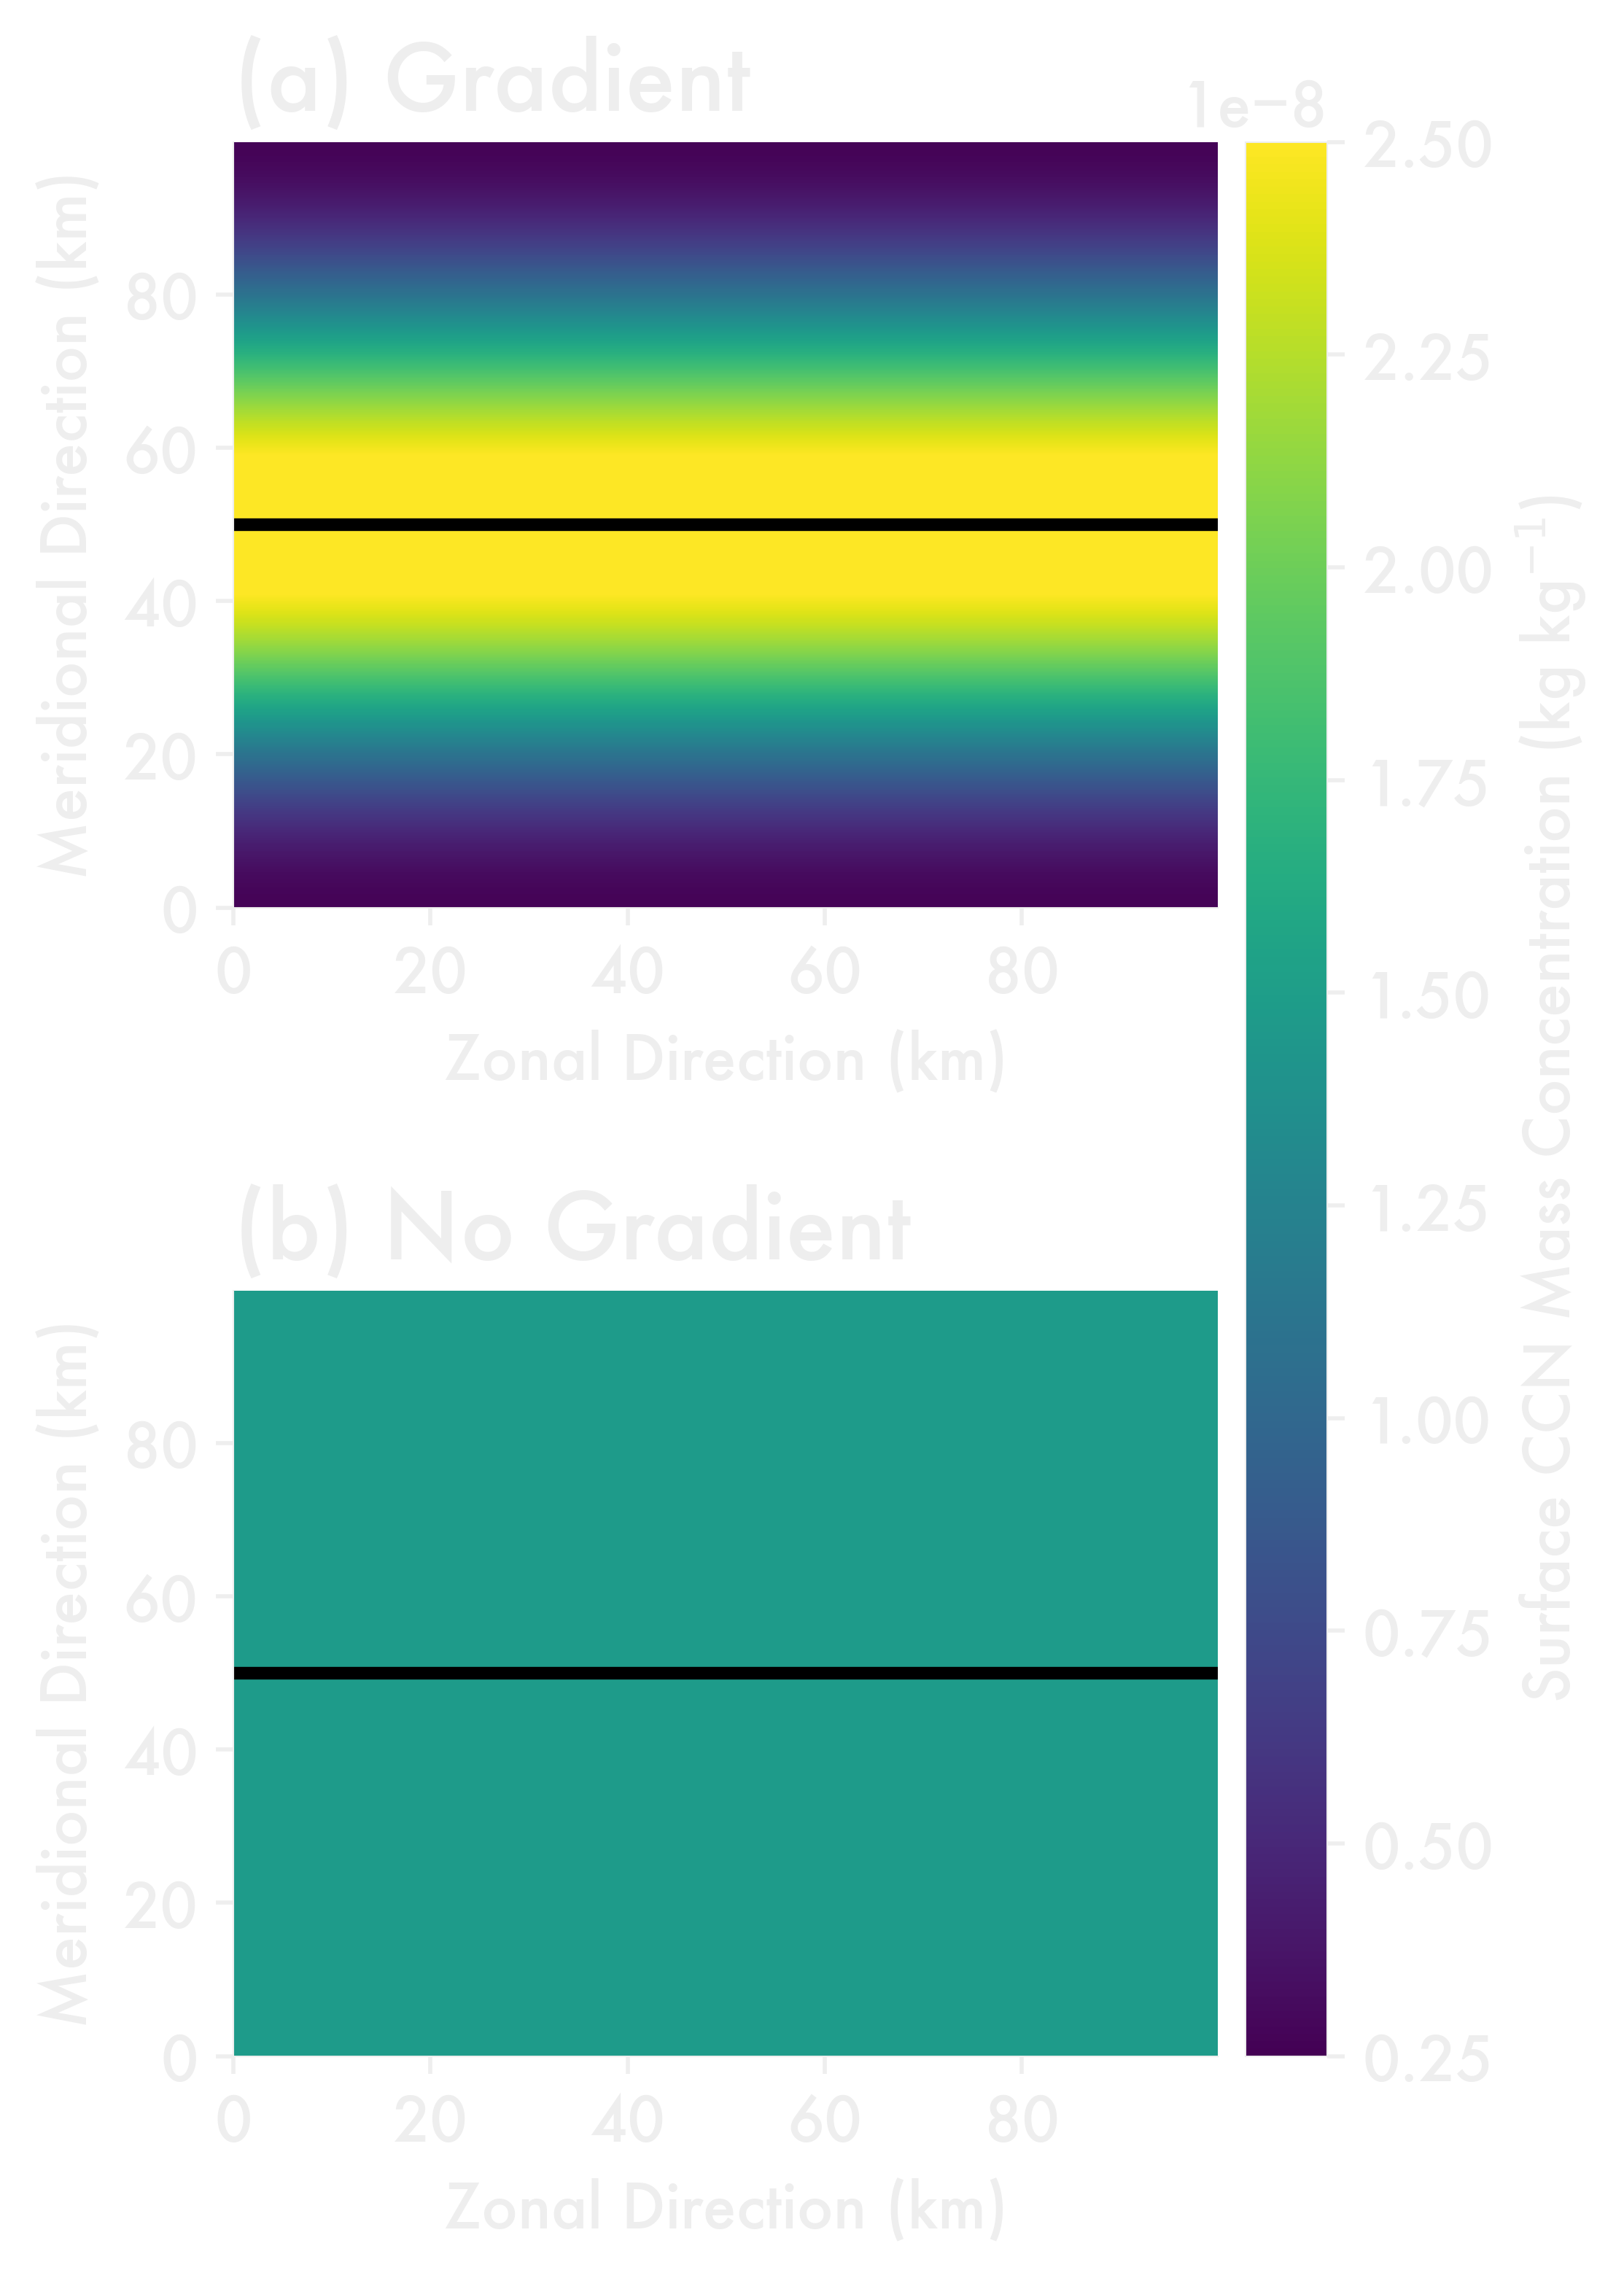

In [103]:
data = xr.open_dataset(f"/camp2e/gleung/aerograd/grad.1000/a-L-2019-09-16-000000-g1.h5")[['CCCMP']]
gprof = data.sel(phony_dim_1=500, phony_dim_0=500).CCCMP.data
gprof0 = data.sel(phony_dim_1=0, phony_dim_0=0).CCCMP.data
data = data.sel(phony_dim_2=1)
data = data.CCCMP.data.T

ndata = xr.open_dataset(f"/camp2e/gleung/aerograd/nograd.1000/a-L-2019-09-16-000000-g1.h5")[['CCCMP']]
nprof = ndata.sel(phony_dim_1=500, phony_dim_0=500).CCCMP.data
ndata = ndata.sel(phony_dim_2=1)
ndata = ndata.CCCMP.data.T

fig, [ax,ax2] = plt.subplots(2,1,figsize=(3,6))

plt.subplots_adjust(hspace=0.5)
ax.set_title('(a) Gradient')

ax.pcolormesh(np.arange(0,100,0.1),
                np.arange(0,100,0.1),
                data.T,
              vmax = 2.5e-08, vmin=2.5e-09)
ax.set_xlabel('Zonal Direction (km)')
ax.set_ylabel('Meridional Direction (km)')

ax2.set_title('(b) No Gradient')

c = ax2.pcolormesh(np.arange(0,100,0.1),
                np.arange(0,100,0.1),
                ndata.T, 
                   vmax = 2.5e-08, vmin=2.5e-09)

ax2.set_xlabel('Zonal Direction (km)')
ax2.set_ylabel('Meridional Direction (km)')

ax.axhline(50,color='black')
ax2.axhline(50,color='black')

cax = fig.add_axes([ax.get_position().x1 + 0.025, 
                       ax2.get_position().y0,
                       0.075,
                       ax.get_position().y1 - ax2.get_position().y0])
plt.colorbar(c,cax=cax,
            label = 'Surface CCN Mass Concentration (kg kg$^{-1}$)')


plt.savefig(f"{figPath}/surfccn.png")
plt.show()

In [110]:
print(alt)

z
0        -24.667482
1         24.888502
2         75.336494
3        126.692551
4        178.973022
           ...     
115    18107.595703
116    18407.595703
117    18707.595703
118    19007.595703
119    19307.595703
Length: 120, dtype: float64


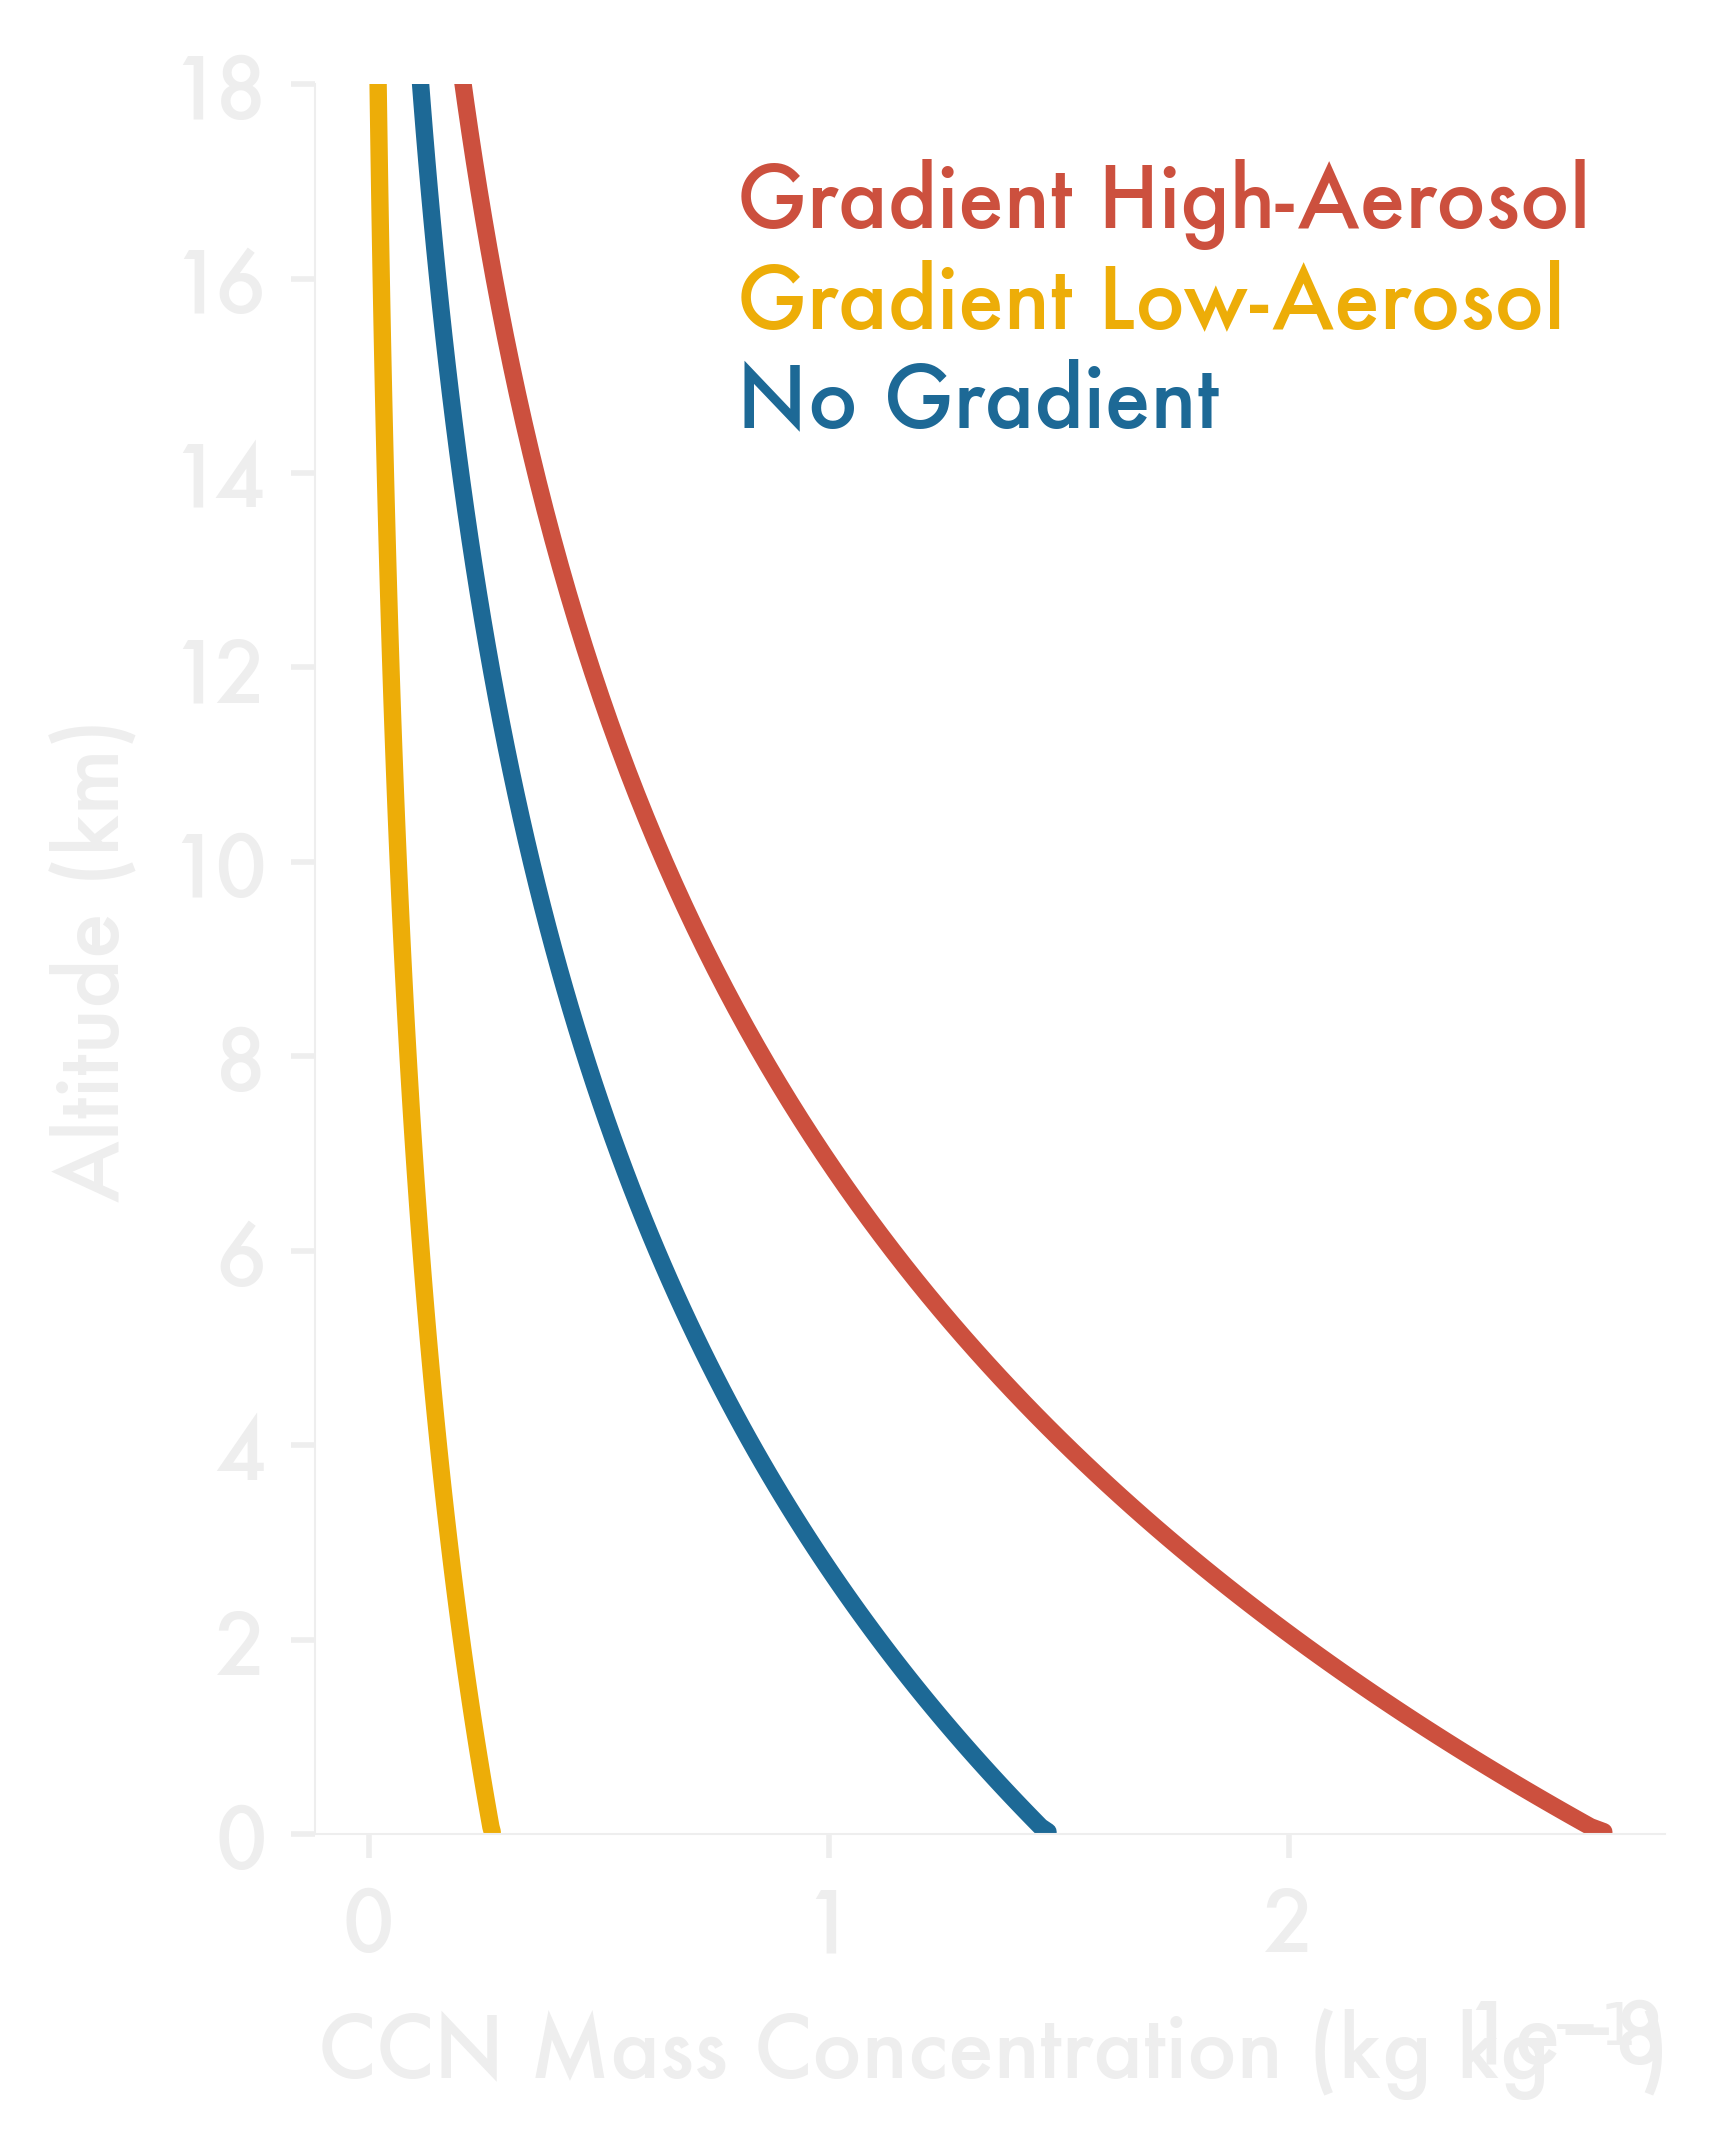

In [109]:
fig, ax = plt.subplots(1,1, figsize=(3,4))

ax.plot(gprof, alt/1000, color=red, label = 'Gradient High-Aerosol')
ax.plot(gprof0, alt/1000, color=yellow, label = 'Gradient Low-Aerosol')
ax.plot(nprof, alt/1000, color=blue, label = 'No Gradient')

ax.set_ylim(0,18)
ax.set_ylabel('Altitude (km)')
ax.set_xlabel('CCN Mass Concentration (kg kg$^{-1}$)')
add_legend(ax)

plt.savefig(f"{figPath}vertprofccn.png")

In [8]:
runName = 'grad.1000'

anaPath = f'/camp2e/gleung/aerograd-analysis/{runName}/'


grad.1000
0.0399526507925671
0.037155903562062574
nograd.1000
0.022427620772607338
0.0350611041722724
grad.500
0.0
0.020195988885873668
nograd.500
0.0
0.020472809346147203


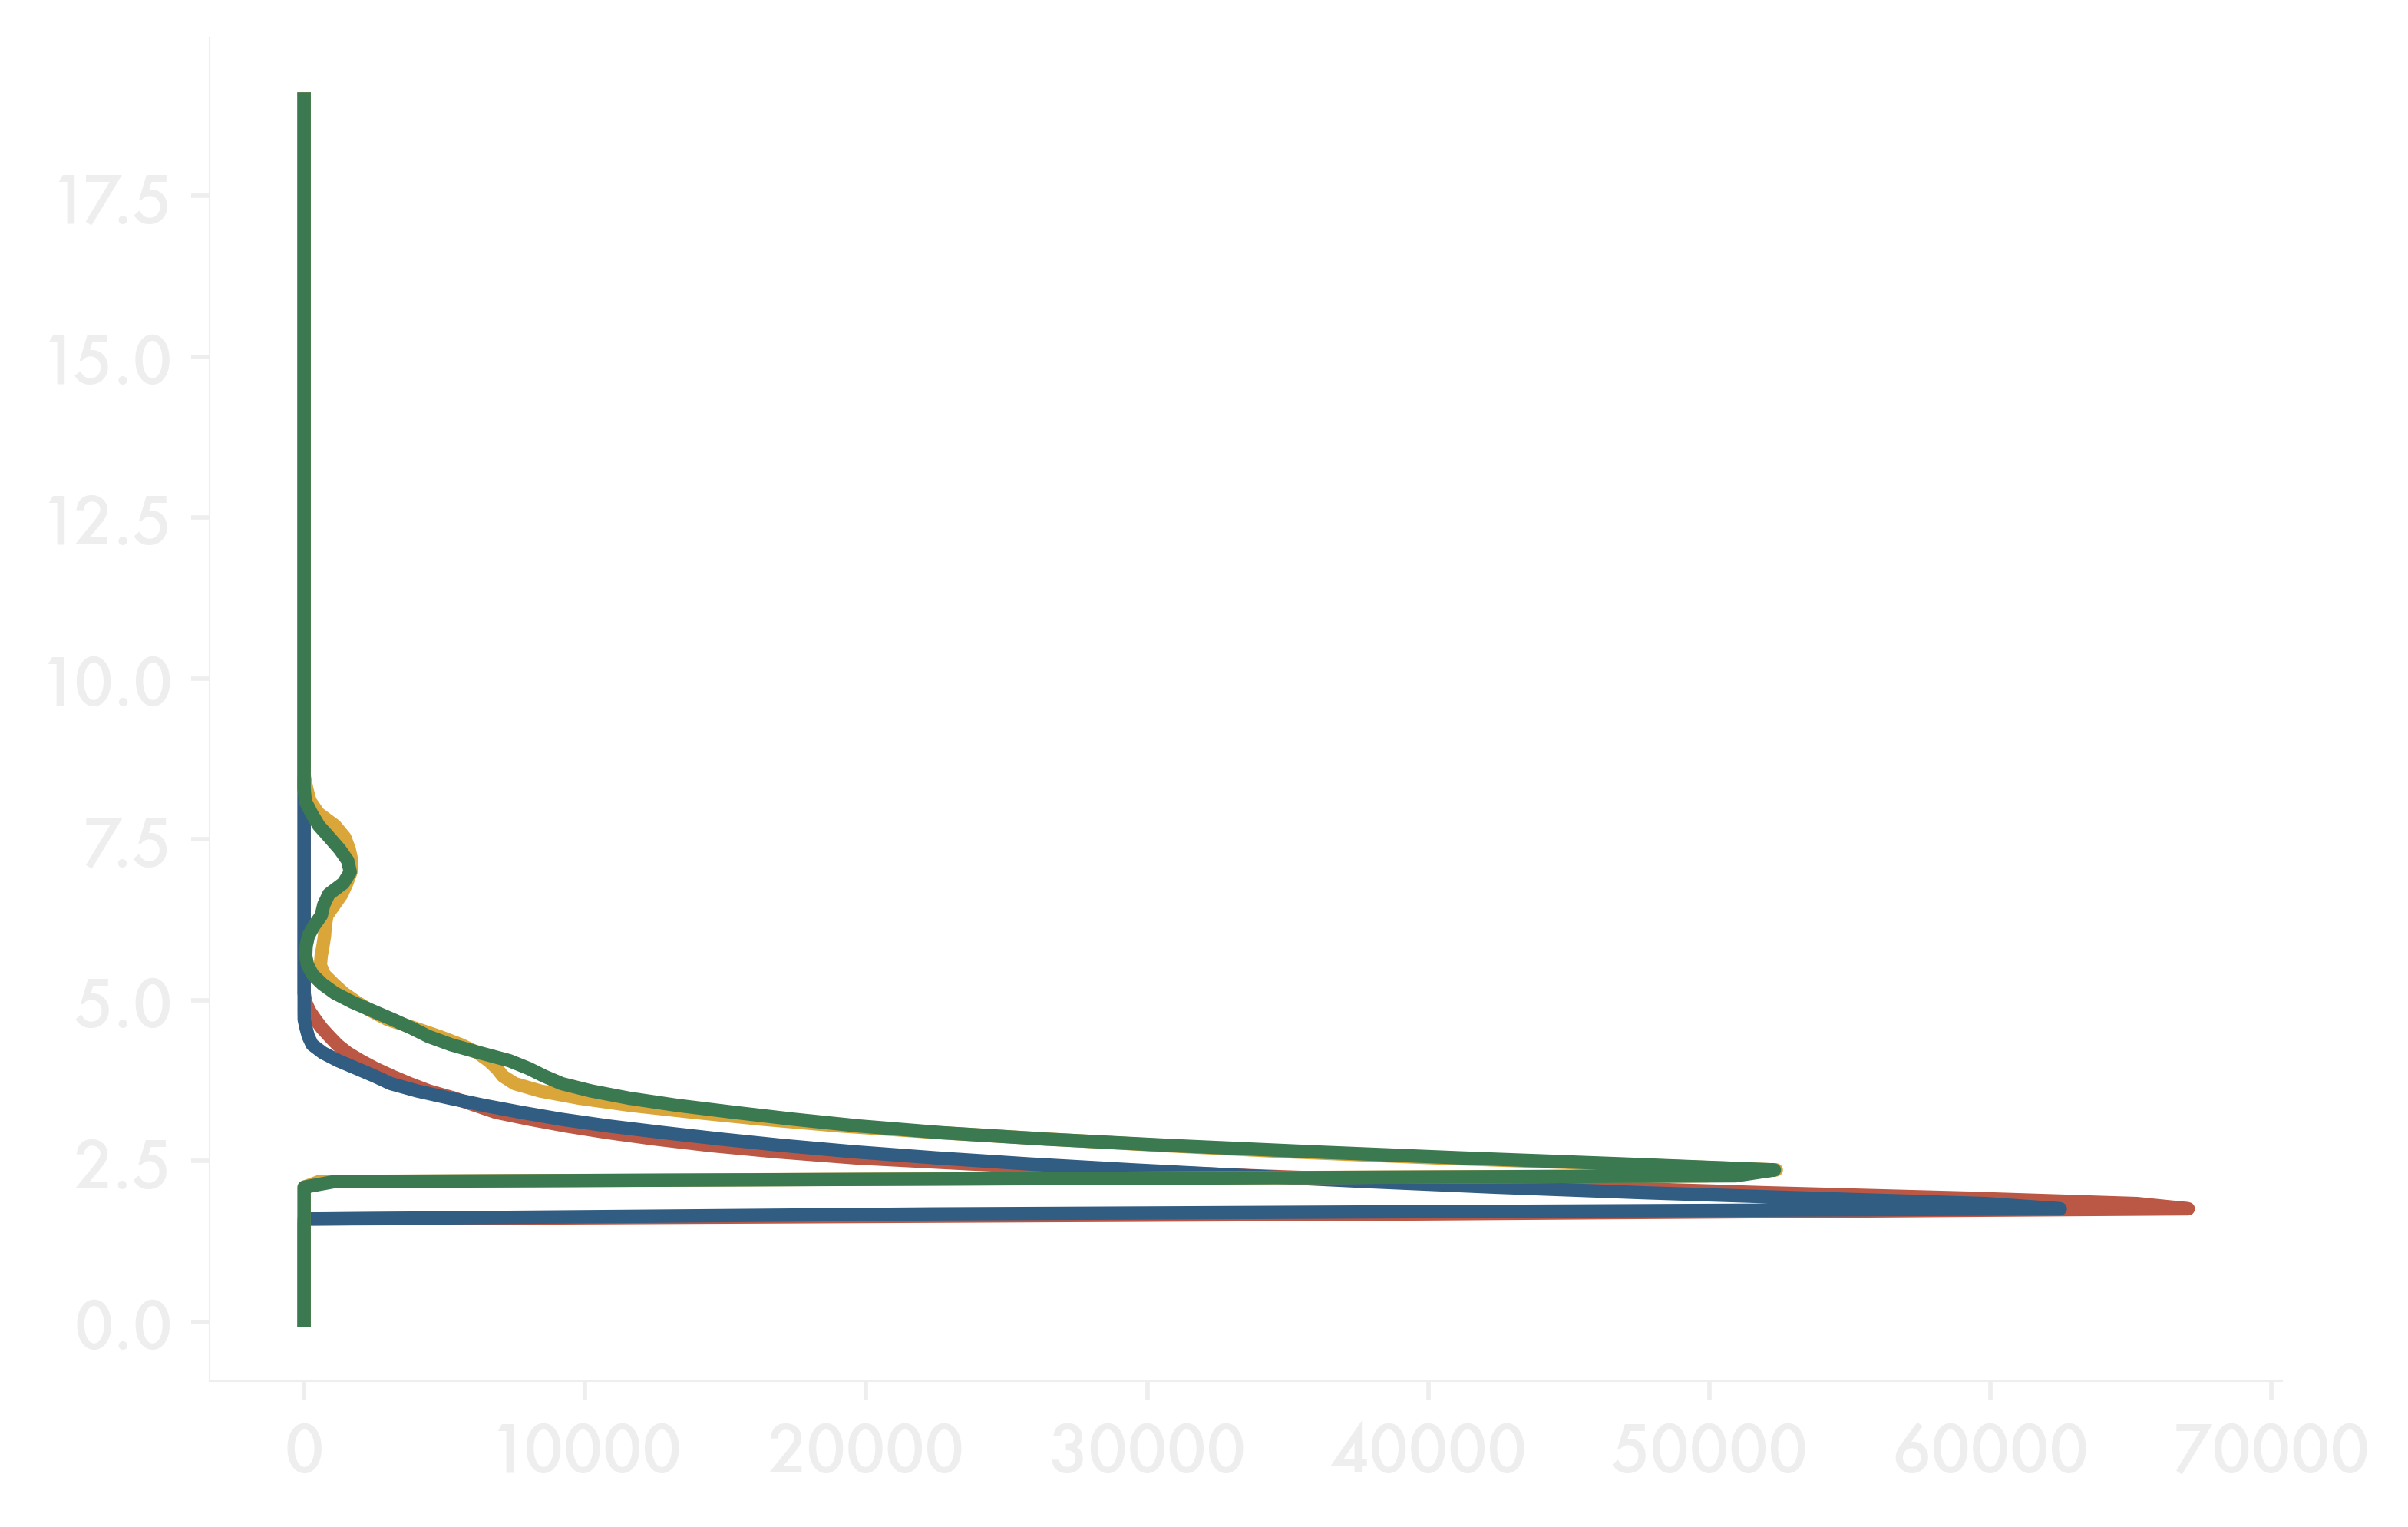

In [68]:
import h5py

for runName in ['grad.1000','nograd.1000','grad.500','nograd.500']:
    print(runName)
    dataPath= f'/camp2e/gleung/aerograd/{runName}/'

    paths = [f"{dataPath}{p}" for p in sorted(os.listdir(dataPath)) if (p.startswith('a-L') and p.endswith('.h5'))]

    p = paths[-12]
    
    with h5py.File(p) as f:
        rcp = f['RCP'][1:119,1:999,1:999]
        rpp= f['RPP'][1:119,1:999,1:999]
        rsp = f['RSP'][1:119,1:999,1:999]
        
        ovar = rcp + rpp + rsp

        ovar = np.where(ovar>=1E-5, ovar, 0)
        
        out = np.count_nonzero(ovar, axis=2)
        
        plt.plot(out.sum(axis=1),alt[1:-1]/1000)
        
        print(out.sum(axis=1)[26]/(998*998))
        print((out.sum(axis=1)[26:40]/(998*998)).mean())
    
plt.show()

In [67]:
print(alt[26]/1000)
print(alt[35]/1000)
print(alt[40]/1000)

1.600123046875
2.362612060546875
2.84220556640625


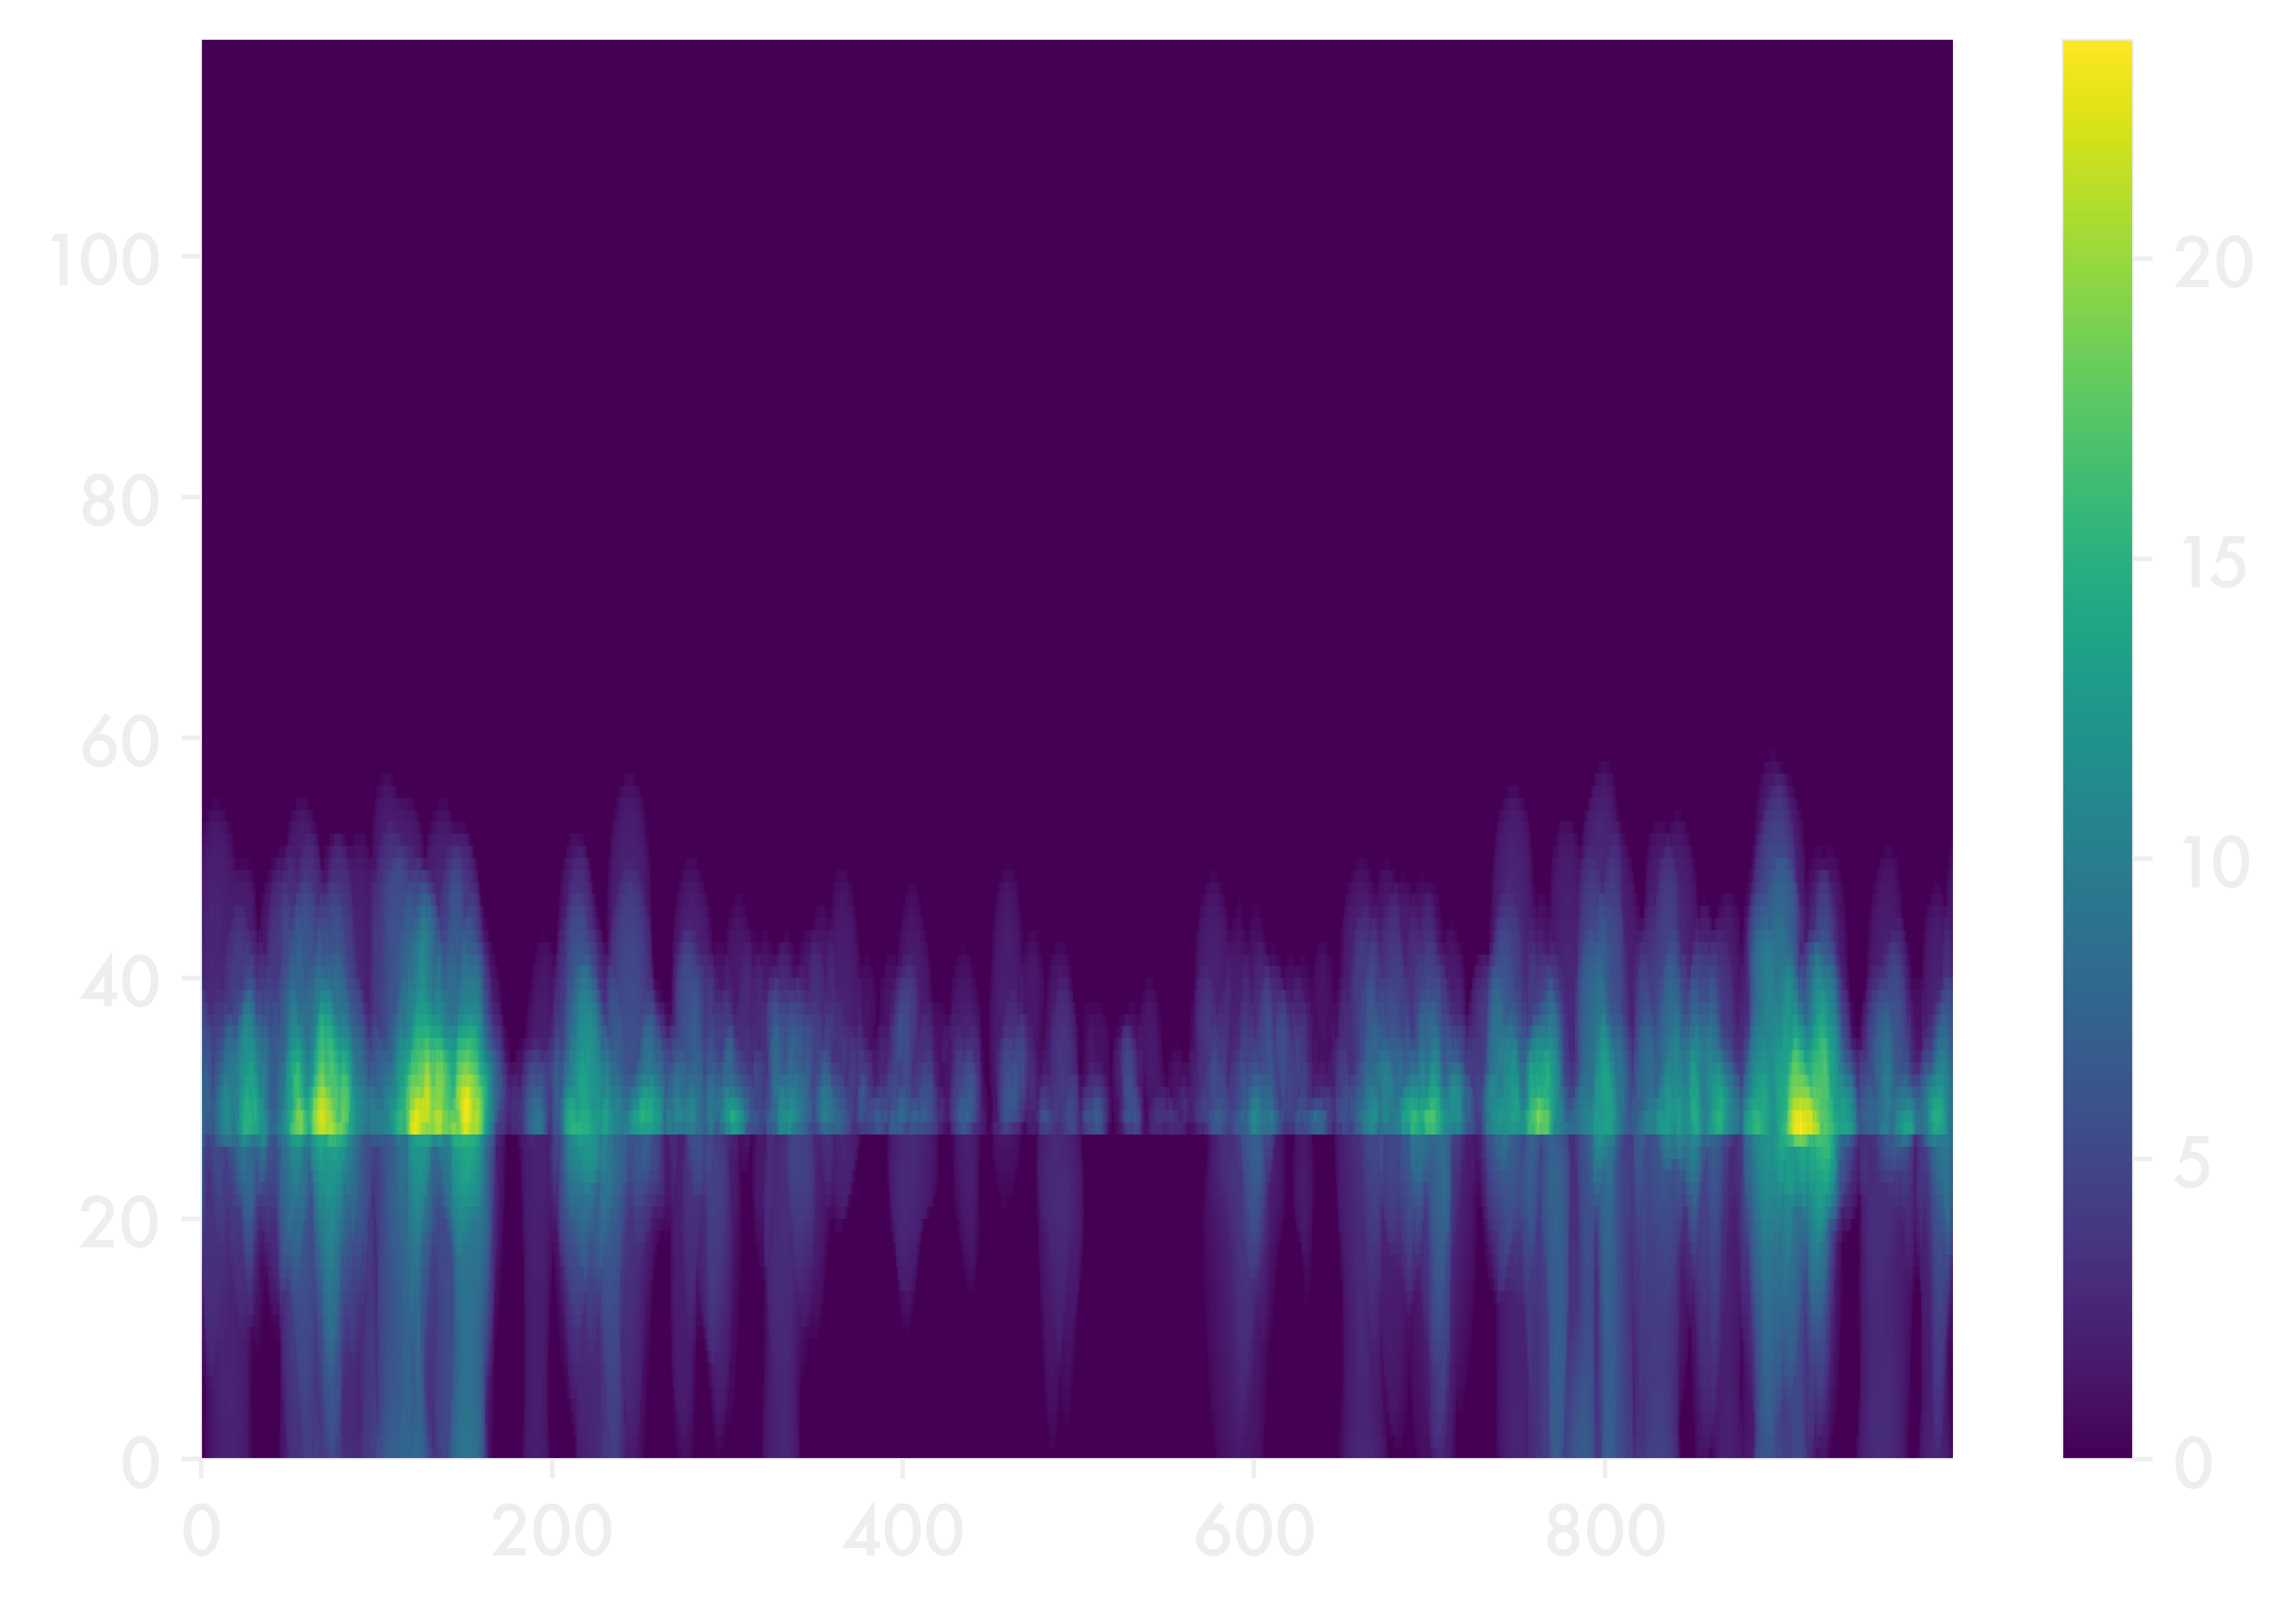

In [31]:
c = plt.pcolormesh(100*np.count_nonzero(ovar,axis=2)/998)
plt.colorbar(c)

In [4]:
conc = '500.norad'

resx = 5
h = 12
bins = np.arange(0,50+resx,resx)

g = pd.read_hdf(f"{anaPath}grad.{conc}/tobac-out/w_features_track.h5",'table')
g = g[g.frame<=144]
g['sum_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
g['mean_pcprr'] = g.feature.map(pd.read_pickle(f"{anaPath}grad.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
g['maxcell_pcprr'] = g.cell.map(g.groupby('cell').mean_pcprr.mean())
g = g[g.maxcell_pcprr*3600>0.1]
g = g[g.lifetime>dt.timedelta(minutes=5)]
g['absx'] = resx * (abs(((g.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx) 
grad = pd.Series(np.histogram(g.absx, bins = bins)[0]).copy()
grad.index = (bins[1:]+bins[:-1])/2

n = pd.read_hdf(f"{anaPath}nograd.{conc}/tobac-out/w_features_track.h5",'table')
n = n[n.frame<=144]
n['sum_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').sum_pcprr)
n['mean_pcprr'] = n.feature.map(pd.read_pickle(f"{anaPath}nograd.{conc}/tobac-out/pcprr_features.pkl").set_index('feature').mean_pcprr)
n['maxcell_pcprr'] = n.cell.map(n.groupby('cell').mean_pcprr.mean())
n = n[n.maxcell_pcprr*3600>0.1]
n = n[n.lifetime>dt.timedelta(minutes=5)]
n['absx'] = resx * (abs(((n.hdim_1 + 1) * dx/1000) + 0.05 - 50)//resx) 
nograd = pd.Series(np.histogram(n.absx, bins = bins)[0]).copy()
nograd.index = (bins[1:]+bins[:-1])/2


print((grad.sum() - nograd.sum())/nograd.sum())

FileNotFoundError: File /camp2e/gleung/aerograd-analysis/grad.500.norad/tobac-out/w_features_track.h5 does not exist

# Radiation Budget

In [189]:
run = 'grad.1000.nomic'

h = 12

plot = pd.read_pickle(f"{anaPath}{run}/mean_cross_section-{h}.pkl")

plot['SWNET'] = plot.SWDN - plot.SWUP
plot['LWNET'] = plot.LWDN - plot.LWUP

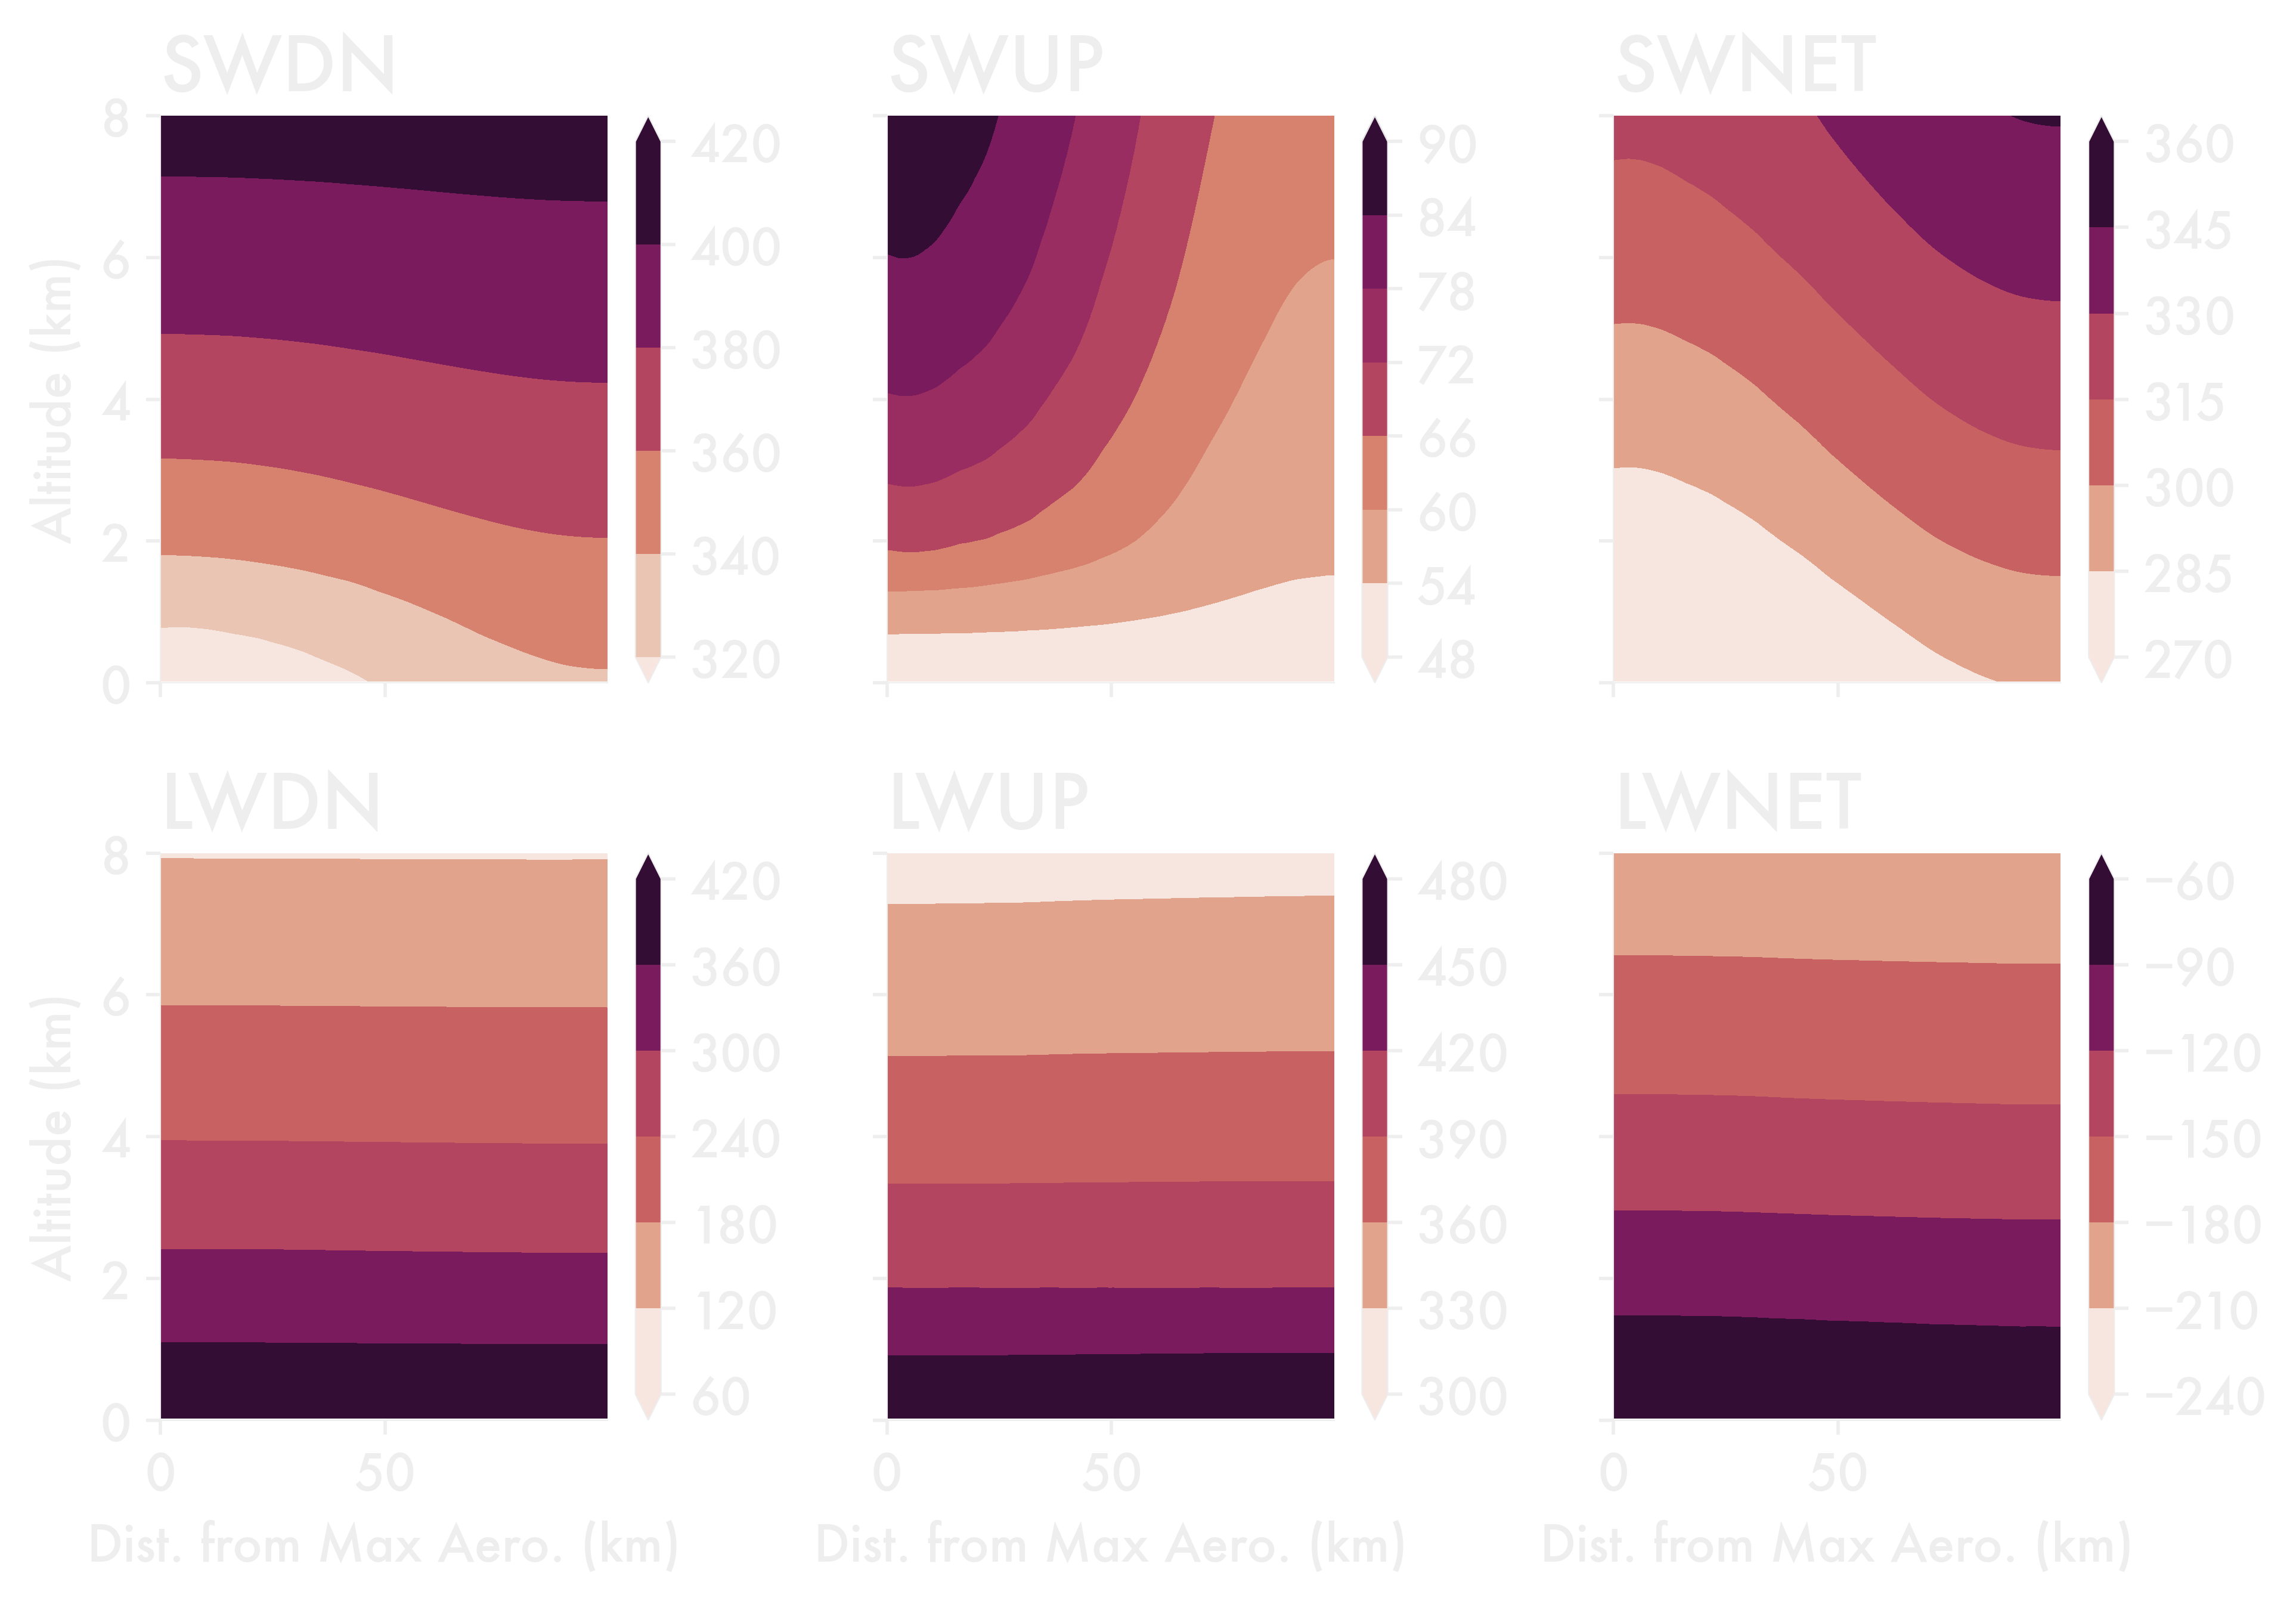

In [190]:
fig,axes = plt.subplots(2,3,figsize=(7.5,5), 
                   sharex=True,sharey=True)

for ax, var in zip(axes.flatten(),
                   ['SWDN','SWUP','SWNET',
                    'LWDN','LWUP','LWNET']):

    c = ax.contourf(sorted(plot.absx.unique()*2), alt[1:-1]/1000, 
             plot.pivot(index='z',columns='absx',values=var),
            extend='both',
            cmap=curltop,
            #levels = np.linspace(300,400,11)
                   )
    plt.colorbar(c,ax=ax)
    ax.set_title(var)
    
    ax.set_ylim(0,8)
    
for ax in axes.T[0]:
    ax.set_ylabel('Altitude (km)')
    
for ax in axes[1]:
    ax.set_xlabel('Dist. from Max Aero. (km)')

#plt.savefig(f"{figPath}/radiation-budget.png",dpi=300)
plt.show()

In [128]:
run = 'grad.1000'

h = 12

surf = pd.read_pickle(f"{anaPath}{run}/mean_surf_flux-{h}.pkl")

In [138]:
print(surf.SHF.describe())
print(surf.LHF.describe())

print((surf.LHF+surf.SHF).describe())

count    200.000000
mean     133.565695
std        4.601499
min      126.757788
25%      129.449807
50%      133.789528
75%      138.255468
max      140.786119
Name: SHF, dtype: float64
count    200.000000
mean      26.840834
std        2.238859
min       24.271922
25%       24.612398
50%       26.044386
75%       28.930891
max       30.774991
Name: LHF, dtype: float64
count    200.000000
mean     160.406529
std        6.761781
min      151.029710
25%      154.075203
50%      159.913352
75%      167.096529
max      170.648595
dtype: float64


In [149]:
ds = xr.open_dataset(f"{dataPath}/a-L-2019-09-16-100000-g1.h5")[['SFLUX_T','SFLUX_R','CCCMP']]

In [151]:
ds = ds.sel(phony_dim_2=0)

In [154]:
ds = ds.mean(dim='phony_dim_1')

In [160]:
ds = ds.to_dataframe()

In [163]:
ds['absx'] = abs(ds.index - 499.5)

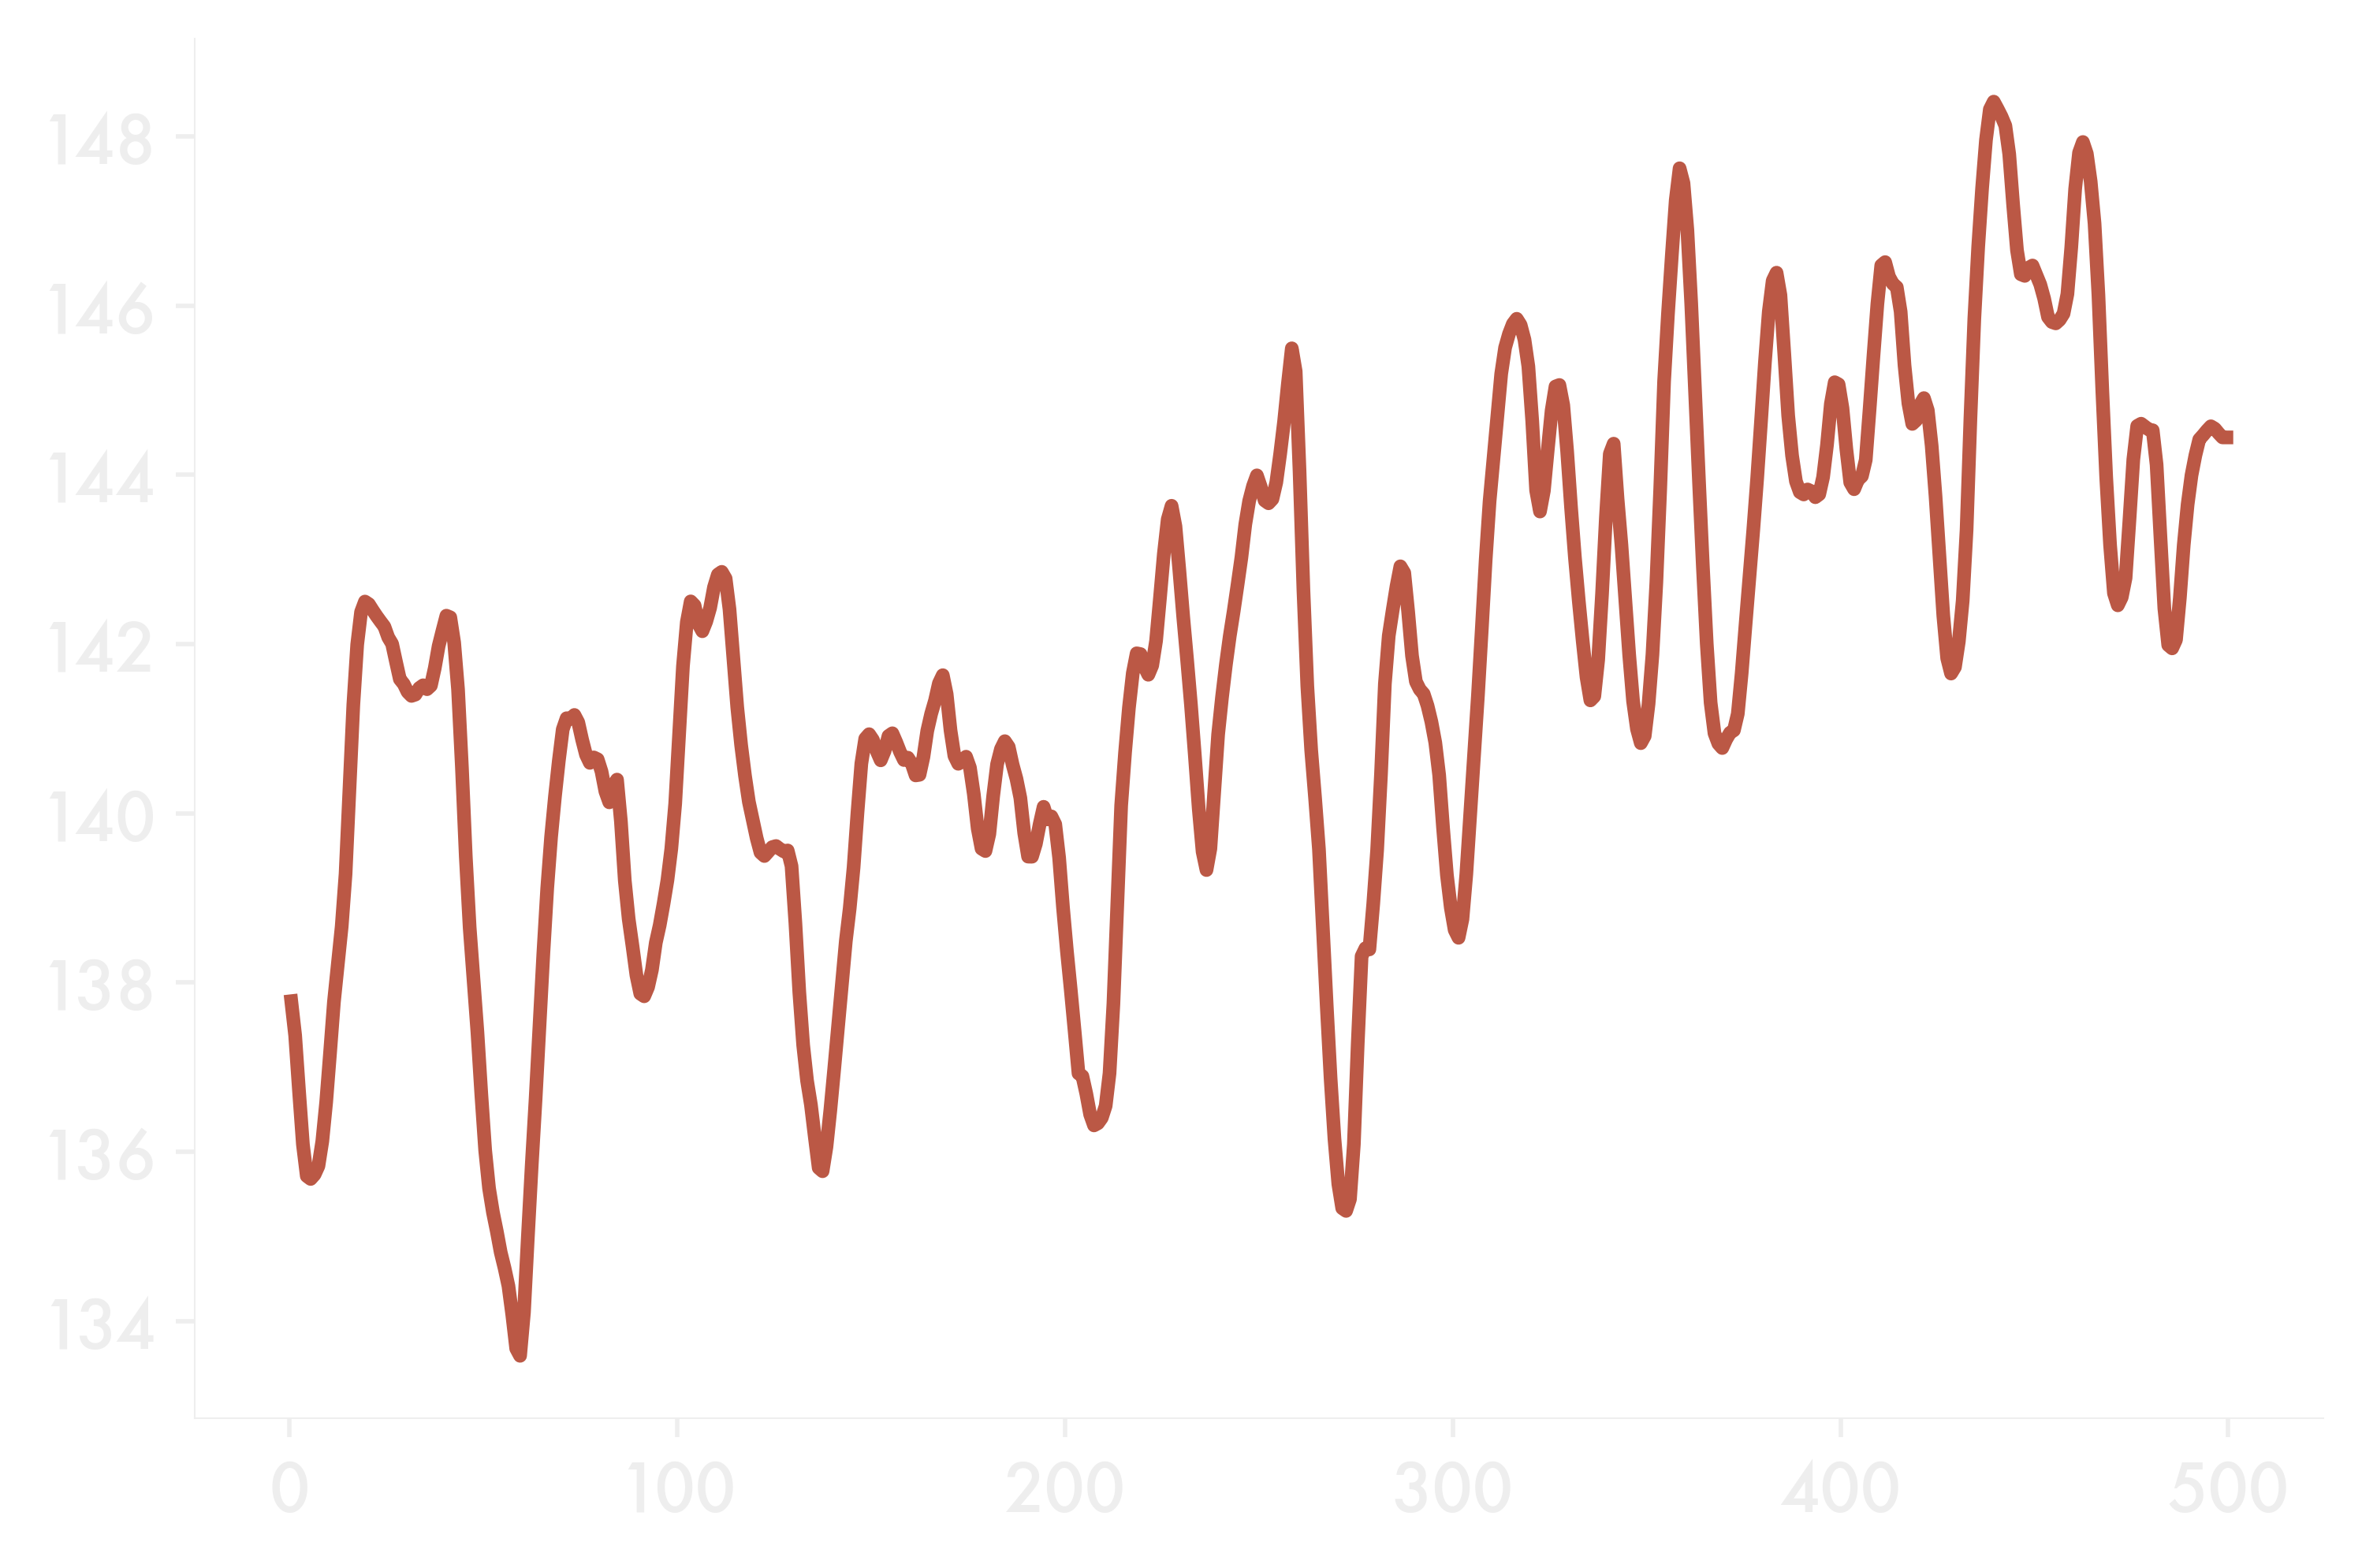

In [167]:
plt.plot(ds.groupby('absx').SFLUX_T.mean()*1004)
#plt.plot(ds.groupby('absx').SFLUX_R.mean()*2.5E6)

In [172]:
print(ds.SFLUX_T*1004/(ds.SFLUX_R*2.5E6))

phony_dim_0
0      5.346258
1      5.346258
2      5.315069
3      5.306904
4      5.338863
         ...   
995    5.457298
996    5.441591
997    5.398158
998    5.346257
999    5.346257
Length: 1000, dtype: float32
